# Efeito Hall Quântico

- PET - Física
- Ex-Petiano: Gabriel Wendell Celestino Rocha
- Data: 06 de Outubro de 2023

O objetivo deste `Notebook` é dar fornecer uma visão da física topológica. As noções básicas de física topológica são introduzidas e aplicadas a diferentes modelos. O efeito Hall quântico, tema que será explorado ao longo deste `Notebook`, é destacado através do modelo $1/3$ de Harper-Hofstadter. Ao fim deste `Notebook` é feita uma comparação dos resultados obtidos neste `Notebook` com os resultados presentes na literatura.

Para uma melhor organização deste `Notebook` como um todo, este foi dividido em **5** seções:

1. **Introdução**;
2. **Modelos Dirac e Honeycomb**;
3. **Modelo Harper-Hofstadter $(\phi=1/3)$**;
4. **Dinâmica**;
5. **Conclusões**.

## Pré-requisitos

Este `Notebook` é voltado para alunos de cursos de pós-graduação em Física que estejam desenvolvendo pesquisa na área de Mecânica Quântica. Dessa forma, se assume que o leitor já possui uma base sólida em Mecânica Quântica Moderna, uma vez que o assunto aqui abordado geralmente só é apresentado em cursos de pós-graduação em Mecânica Quântica ou em Trabalhos de Conclusão de Curso (TCCs) de estudantes que fazem pesquisa em áreas correlacionadas ou derivadas da Mecânica Quântica. Como mencionado mais abaixo, este `Notebook` foi inspirado em um TCC sobre efeito Hall quântico aplicado para modelos de redes aleatórias. Diante disso, é necessário que o leitor tenha conhecimento da área de Mecânica Quântica no nível apresentado no livro *Modern Quantum Mechanics* de J. J. Sakurai. Note que esse `Notebook` serve como uma introdução ao estudo do efeito Hall quântico para estudantes de pós-graduação.

----

## Agradecimento

Gostaria de agradecer ao meu colega de curso Luigy M. Pinto por inspirar a elaboração do presente `Notebook`. Em sua defesa do seu Trabalho de Conclusão de Curso (TCC) intitulado _Transições de fase no efeito Hall quântico e modelos de redes aleatórias_, Luigy me inspirou a pesquisar mais sobre o assunto e assim moldar o presente `Notebook` (apesar de eu não abordar redes aleatórias aqui). Eis aqui então os meus mais sinceros agradecimentos.

---

### Importando as bibliotecas

In [1]:
import scipy.linalg as sp_linalg
import matplotlib.pyplot as plt
from numpy import linalg
import scipy as scp
import numpy as np
import sympy as sp
import time

%matplotlib inline

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.rcParams['text.usetex'] = True
    # plt.rcParams['font.family'] = 'monospace'
    plt.rcParams['font.size'] = 15
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)
    
import warnings
warnings.filterwarnings('ignore')

#### Detalhes das bibliotecas:

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy, Scipy, Sympy

Software versions
Python 3.9.8 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.0.1
OS Windows 10 10.0.19045
Matplotlib 3.6.0
Numpy 1.21.6
Scipy 1.8.0
Sympy 1.9
Mon May 29 14:25:17 2023 Hora Padrão de Buenos Aires

---

## 1. Introdução

Vamos primeiro explicar o que é o efeito Hall quântico e quais são as noções-chave para entendê-lo. Vamos também apresentar dois métodos para calcular algumas quantidades de interesse.

### 1.1 Efeitos Hall

Na mecânica clássica, quando um campo elétrico é aplicado nas extremidades de um material condutor, digamos que na direção $x$, uma corrente $J_x$, paralela a $E_x$, é produzida. Se o material estiver imerso em um campo magnético, os elétrons em movimento se desviarão progressivamente de uma trajetória reta em um plano perpendicular respectivamente ao campo magnético aplicado. Em um material de tamanho finito com dimensões adequadas, esse desvio pode causar um acúmulo de cargas negativas em um lado do material e um acúmulo de cargas positivas no lado oposto. Isso leva a induzir um campo elétrico entre as zonas de cargas opostas – veja a figura abaixo retirada de **[1]** – chamado de campo elétrico de Hall $E_H$, que é relacionado a $J_x$ pela lei de Ohm: $J=\sigma E_{H}$, sendo $\sigma$ o tensor de condutividade. Como a corrente na direção $x$ induz um campo elétrico na direção $y$, concluímos que o elemento $\sigma_{yx}$ não desaparece.

![Figura 1](img/Efeito_Hall/img1.png)

O efeito Hall quântico inteiro, por outro lado, é historicamente o primeiro fenômeno em que a topologia espaço-momento foi reconhecida como levando a fenômenos físicos observáveis. Para experimentar tal efeito, esquematicamente, podemos aplicar um campo elétrico entre duas arestas opostas de um isolador e esperar medir uma corrente entre as outras duas arestas, pois a lei de Ohm ainda é válida. Vamos enfrentar uma quantização da condutividade:

$$\tag{1.1}
\sigma_{yx}=\frac{e^{2}}{h}n,\quad n\in\mathbb{Z}\text{},
$$

onde $e$ é a carga do elétron e $h$ é a constante de Planck. A dependência de $\sigma_{yx}$ no campo magnético então assume a forma de bandejas e muda de $n$ para $n+1$ para um determinado valor de $\boldsymbol{B}$. Como veremos, a corrente realmente se propaga ao longo das bordas, não através do volume (já que enfrentamos um isolante).

### 1.2 Teorema adiabático

Seja um Hamiltoniano $H$ dependendo de um parâmetro externo (este parâmetro pode ser um campo magnético ou quasimomenta $\boldsymbol{k}=\frac{2pi}{λ}$, para $\lambda$ um comprimento de onda) $\lambda$ evoluindo no espaço de parâmetros com uma dada dimensão **[2]**, **[3]**, **[4]** e **[5]**. Suponhamos que $\lambda$ varie e volte ao seu valor inicial após um tempo $T: \boldsymbol{\lambda}(0) = \boldsymbol{\lambda}(T)$. Se denotamos autovalores e autovetores de $H(\boldsymbol{\lambda})$ respectivamente $E_n(V)$ e $|\psi_n(\boldsymbol{\lambda})\rangle$, $n\in\mathbb{N}$ tal que

$$\tag{1.2}
H\left(\boldsymbol{\lambda}\right)|\psi_{n}\left(\boldsymbol{\lambda}\right)\rangle=E_{n}\left(\boldsymbol{\lambda}\right)|\psi_{n}\left(\boldsymbol{\lambda}\right)\rangle\text{}.
$$

Impomos ainda que a base dos autovetores permaneça ortonormal, independentemente do valor de $\boldsymbol{\lambda}$. Vamos dar uma olhada na evolução no tempo do vetor

$$\tag{1.3}
|\psi\left(t\right)\rangle=\sum_{n}c_{n}\left(t\right)|\psi\left[\boldsymbol{\lambda}\left(t\right)\right]\rangle\text{ }.
$$

Se relatarmos essa expressão na equação de Schrödinger,

$$\tag{1.4}
i\hbar\frac{\text{d}|\psi\rangle}{\text{d}t}=\hat{H}\left[\boldsymbol{\lambda}\right]|\psi\left(t\right)\rangle\text{ },
$$

e multiplicando por $\langle\psi_{\ell}\left[\boldsymbol{\lambda}\left(t\right)\right]|$, obtemos

$$\tag{1.5}
i\hbar\dot{c}_{\ell}=E_{\ell}\left(t\right)c_{\ell}\left(t\right)-\hbar\sum_{n}\alpha_{\ell,n}\left(t\right)c_{n}\left(t\right)\text{ },
$$

$$
\alpha_{\ell,n}\left(t\right)=i\dot{\boldsymbol{\lambda}}\cdot\langle\psi_{\ell}\left(\boldsymbol{\lambda}\right)|\boldsymbol{\nabla}\psi_{n}\left(\boldsymbol{\lambda}\right)\rangle=\frac{1}{i\hbar\omega_{\ell,n}}\langle\psi_{\ell}|\frac{\text{d}\hat{H}}{\text{d}t}|\psi_{n}\rangle\text{ }.
$$

Defina $\hbar\omega_{\ell,n}=E_{\ell}\left[\boldsymbol{\lambda}\left(t\right)\right]-E_{n}\left[\boldsymbol{\lambda}\left(t\right)\right]$. Para o restante desta discussão, impomos duas coisas: os autovalores são não degenerados e $\boldsymbol{\lambda}$ evolui lentamente no tempo, ou seja,

$$\tag{1.6}
n\neq\ell\text{ }:\qquad\frac{|\alpha_{\ell,n}^{\text{max}}|}{|\omega_{\ell,n}^{\text{min}}|}=\frac{\text{velocidade angular máxima de }\psi_{n}}{\text{pulsação de Bohr mínima de }\psi_{n}}\ll1\text{ }.
$$

Essa condição garante que a probabilidade de $\psi_{\ell}$ permanecer com a mesma energia permaneça sempre próxima de $1$: $|c_{\ell}\left(t\right)|\simeq1$. A última coisa que precisamos estudar é a fase desse coeficiente $c_{\ell}\left(t\right)$.

### 1.3 Fase geométrica (ou fase de Berry)

Consideramos um sistema quântico para o qual a aproximação adiabática é válida. Em $t=0$, o sistema está em um autoestado $\psi_{\ell}$ do Hamiltoniano $\hat{H}\left[\boldsymbol{\lambda}\left(0\right)\right]$ e supomos que assim seja em todo
momento:

$$\tag{1.7}
|\psi\left(t\right)\rangle=\sum_{n}c_{n}\left(t\right)|\psi_{n}\left[\boldsymbol{\lambda}\left(t\right)\right]\rangle\simeq c_{\ell}\left(t\right)|\psi_{\ell}\left[\boldsymbol{\lambda}\left(t\right)\right]\rangle\text{ }.
$$

Substituindo este estado na equação de Schrödinger, obtemos

$$\tag{1.8}
i\hbar\dot{c}_{\ell}=\left[E_{\ell}\left(t\right)-i\hbar\dot{\boldsymbol{\lambda}}\cdot\mathcal{A_{\ell}\left(\boldsymbol{\lambda}\right)}\right]c_{\ell}\text{ },
$$

onde $\mathcal{A}_{\ell}\left(\boldsymbol{\lambda}\right)=-i\langle\psi_{\ell}|\nabla_{\boldsymbol{\lambda}}|\psi_{\ell}\rangle$ é a _conexão Berry_. Daí, encontramos

$$\tag{1.9}
c_{\ell}=c_{\ell}\left(0\right)\cdot\exp\left[ \underset{=i\Phi^{\text{dyn.}}}{\underbrace{-\frac{i}{\hbar}\int_{0}^{t}E_{\ell}\left(t'\right)\text{d}t'}}+\underset{=i\Phi^{\text{geom.}}}{\underbrace{\frac{i}{\hbar}\int_{\boldsymbol{\lambda}\left(0\right)}^{\boldsymbol{\lambda}\left(t\right)}\mathcal{A_{\ell}}\left(\boldsymbol{\lambda}\right)\text{d}\boldsymbol{\lambda}}}\right] \quad,
$$

com $\text{d}\boldsymbol{\lambda}=\dot{\boldsymbol{\lambda}}\text{d}t$. Notamos que a fase dinâmica $\Phi^{\text{din.}}$. não depende do caminho seguido durante a evolução, mas de sua duração, ao contrário da fase geométrica $\Phi^{\text{geom.}}$. que depende apenas do caminho seguido $\boldsymbol{\lambda}(t)$. Notamos que este caminho pode ser fechado, ou seja $\boldsymbol{\lambda}(0)=\boldsymbol{\lambda}(T)$ para $T$ sendo o tempo necessário para fechar o caminho:

$$\tag{1.10}
\Phi^{\text{geom.}}=\frac{1}{\hbar}\oint_{\mathcal{C}}\mathcal{A}_{\ell}\left(\boldsymbol{\lambda}\right)\text{d}\boldsymbol{\lambda}\text{ }.
$$

Se o espaço de parâmetros for tridimensional e se a hipótese do teorema de Stokes (em particular, o espaço de parâmetros deve ser simplesmente conectado.) for satisfeita, temos

$$\tag{1.11}
\Phi^{\text{geom.}}=\frac{1}{\hbar}\int\int_{\mathcal{S}}\boldsymbol{\Omega}_{\ell}\cdot\text{d}^{2}\mathcal{S}\text{ },
$$

onde introduzimos a _curvatura de Berry_

$$\tag{1.12}
\boldsymbol{\Omega}_{\ell}=\boldsymbol{\nabla}_{\boldsymbol{\lambda}}\wedge\boldsymbol{\text{A}}_{\ell}=-i\boldsymbol{\nabla}_{\boldsymbol{\lambda}}\wedge\langle\psi_{\ell}|\boldsymbol{\nabla}_{\boldsymbol{\lambda}}\psi_{\ell}\rangle=-i\langle\boldsymbol{\nabla}_{\boldsymbol{\lambda}}\psi_{\ell}|\wedge|\boldsymbol{\nabla}_{\boldsymbol{\lambda}}\psi_{\ell}\rangle\text{ },
$$

e definimos $\mathcal{S}$ como a superfície contando com a curva $\mathcal{C}$.

### 1.4 Mudança de _gauge_ (calibre)

Vamos dar uma olhada nas consequências de uma mudança de de _gauge_ $U\left(1\right)$ na conexão de Berry e na curvatura de Berry. Para fazer isso, multiplicamos o estado $|\psi_{\ell}\left[\boldsymbol{\lambda}\right]\rangle$ por um fator de fase $\chi_{\ell}\left[\boldsymbol{\lambda}\right]$:

$$\tag{1.13}
|\psi_{\ell}\left[\boldsymbol{\lambda}\right]\rangle\rightarrow e^{i\chi_{\ell}\left[\boldsymbol{\lambda}\right]}|\psi_{\ell}\left[\boldsymbol{\lambda}\right]\rangle\text{ }.
$$

Se a função $\chi_{\ell}\left[\boldsymbol{\lambda}\right]$ for suficientemente regular em todos os pontos, a conexão de Berry deve se transformar como

$$\tag{1.14}
\mathcal{A}_{\ell}\left(\boldsymbol{\lambda}\right)\rightarrow\mathcal{\tilde{\mathcal{A}_{\ell}}\left(\boldsymbol{\lambda}\right)}-\nabla_{\chi_{\ell}}\left[\boldsymbol{\lambda}\right]\text{ },
$$

para deixar o problema avaliado invariante. Assim, a curvatura de Berry e a fase de Berry permanecem inalteradas, pois o rotacional de um gradiente desaparece em um caminho fechado, como a integral de um gradiente$^{*}$. Podemos então deduzir que $e^{i\Phi_{\text{geom.}}}=e^{i\tilde{\Phi}_{\text{geom.}}}$. Isso implica que a curvatura de Berry é invariante de calibre.

$^{*}$**OBS**: Se $\chi$ é regular no caminho $\mathcal{C}$, mas não em qualquer lugar em $\mathcal{S}$, então

$$
\oint_{\mathcal{C}}\boldsymbol{\nabla}\chi_{\boldsymbol{\lambda}^{\left(n\right)}}\cdot\text{d}\boldsymbol{\lambda}=\chi_{\text{final}^{\left(n\right)}}-\chi_{\text{inicial}}^{\left(n\right)}=2\pi n\text{ }.
$$

Ou seja, não podemos usar o teorema de Stokes.

### 1.5 Números de Chern

A partir de agora, o espaço dos parâmetros será o espaço dos quase-momentos e nos restringiremos à zona de Brillouin (BZ, do inglês *Brillouin Zone*). A curvatura de Berry é então

$$\tag{1.15}
\boldsymbol{\Omega}_{\boldsymbol{\text{k}}}=i\left(\langle\partial_{k_{x}}u_{\boldsymbol{\text{k}}}|\partial_{k_{y}}u_{\boldsymbol{\text{k}}}\rangle-\langle\partial_{k_{y}}u_{\boldsymbol{\text{k}}}|\partial_{k_{x}}u_{\boldsymbol{\text{k}}}|\rangle\right)\cdot\boldsymbol{\text{u}_{z}}\in\mathbb{R}^{3}\text{ }.
$$

É possível definir os chamados números de Chern para identificar se um determinado estado possui características topológicas não triviais ou não. Esses números são definidos como

$$\tag{1.16}
C_{n}=-\frac{1}{2\pi}\int_{BZ}\text{d}\boldsymbol{k}\cdot\Omega_{\boldsymbol{k}}\text{ },
$$

o que os torna também um invariante de *gauge*.

### 1.6 Métodos de Fukui-Hatsugai-Suzuki e Niu

Vamos agora apresentar dois métodos para calcular a curvatura de Berry e seus números de Chern associados; vamos aplicá-los e compará-los nas próximas seções com os modelos de Dirac e Harper-Hofstadter. O primeiro é o algoritmo Fukui-Hatsugai-Suzuki **[6]**. Quando você deseja calcular a conexão Berry do estado $|n\rangle$, você precisa do bra $\langle n|$ estar no mesmo calibre que $|n\rangle$ então $A^{n}_{\mu} =\langle  n|\partial_{\mu}|n\rangle$. Esse algoritmo nos permite fazer todos os cálculos no mesmo calibre e, portanto, obter quantidades invariantes de calibre no final, como a curvatura de Berry ou os números de Chern devem ser. Além disso, a discretização da zona de Brillouin não apresenta nenhum problema. O truque é usar a quantidade

$$\tag{1.17}
U_{\mu}\left(k_{\ell}\right)\equiv\frac{\langle n\left(k_{\ell}\right)|n\left(k_{\ell}+\hat{\mu}\right)\rangle}{\langle n\left(k_{\ell}\right)|n\left(k_{\ell}+\hat{\mu}\right)\rangle}\in U\left(1\right)\text{ },
$$

onde $k_{\ell}=\left(k_{j1},k_{j2}\right)$, $\text{}k_{k\mu}=\frac{2\pi j_{\mu}}{N_{\mu}}$ e ${}j_{\mu}=1,\ldots,N_{\mu}-1\text{}\left(\mu=1,2\right)$. Graças a $U_{\mu}$, podemos calcular a curvatura de Berry (o ~ simplesmente indica que estamos falando de uma quantidade obtida do código)

$$\tag{1.18}
\tilde{F}_{12}\left(l_{\ell}\right)=\ln\left[\frac{U_{1}\left(k_{\ell}\right)U_{2}\left(k_{\ell}+\hat{1}\right)}{U_{1}\left(k_{\ell}+\hat{2}\right)U_{2}\left(k_{\ell}\right)}\right]\text{ },\quad-\pi\leq\frac{1}{i}\tilde{F}_{12}\leq\pi\text{ },
$$

que é automaticamente um invariante de calibre.

In [3]:
def braket(v1,observable,v2):
    return np.vdot(v1,np.dot(observable,v2))


def U_calc(v1,v2):
    U = np.vdot(v1,v2)
    
    return U/abs(U)

A obtenção dos números de Chern é bastante direta: precisamos integrar toda a zona de Brillouin; isso corresponde à soma de todos os valores de $k_{\ell}$:

$$\tag{1.19}
\tilde{c}_{n}=\frac{1}{2\pi i}\sum_{\ell}\tilde{F}_{12}\left(k_{\ell}\right)\text{ }.
$$

O que é notável sobre tudo isso reside no fato de que você pode escolher qualquer (para mais detalhes, veja o artigo de Fukui, Hatsugai e Suzuki) discretização da zona magnética de Brillouin, você obtém $\tilde{c}_{n}\in\mathbb{Z}$.

Vamos implementar o método de Fukui-Hatsugai-Suzuki para uma única plaqueta. Para isso, vamos definir uma função que chamaremos de `FHS()`. Os argumentos de entrada e saída de nossa função serão os seguinte:

`FHS()`:

- **Entrada**:
> 1. Hamiltoniano do sistema (que deve ser função de $k_x$ e $k_y$) ;
> 2. Coordenadas do ponto na BZ ;
> 3. Dimensões de uma plaqueta na BZ .

- **Saída**:
> Curvatura de Berry no ponto $(k_x,k_y)$ na BZ .

In [4]:
def FHS(H,n, kx,ky, dkx,dky, DP_x,DP_y, Delta):     
    eigV_0 = linalg.eigh(H(kx, ky, DP_x, DP_y, Delta))[1][:,n]
    eigV_1 = linalg.eigh(H(kx+dkx, ky, DP_x, DP_y, Delta))[1][:,n]
    eigV_2 = linalg.eigh(H(kx+dkx, ky+dky, DP_x, DP_y, Delta))[1][:,n]
    eigV_3 = linalg.eigh(H(kx, ky+dky, DP_x, DP_y, Delta))[1][:,n]
    
    U_01 = U_calc(eigV_0, eigV_1)
    U_12 = U_calc(eigV_1, eigV_2)
    U_23 = U_calc(eigV_2, eigV_3)
    U_30 = U_calc(eigV_3, eigV_0)
    
    
    return (np.log(U_01*U_12*U_23*U_30)/dkx/dky).imag

O segundo método é a fórmula de Niu **[7]** que consiste em calcular a curvatura de Berry do nível $n$ como

$$\tag{1.20}
\boldsymbol{\Omega}_{\boldsymbol{\text{k}}}^{n}=\frac{1}{i}\sum_{n'\neq n}\frac{\langle n|\partial_{k_{x}}H|n'\rangle\langle n'|\partial_{k_{y}}H|n\rangle-\langle n|\partial_{k_{y}}H|n'\rangle\langle n'|\partial_{k_{x}}H|n\rangle}{\left(E_{n}-E_{n'}\right)^{2}}\in\mathbb{R}\text{ },
$$

onde $|n'\rangle$ é o autovetor associado a $E_{n'}$. A demonstração dessa fórmula consiste em ver que, para $n\neq n'$,

$$
\langle n|\frac{\partial H}{\partial k_{x}}|n'\rangle=\frac{\partial}{\partial k_{x}}\left(\langle n|H\rangle\right)|n'\rangle-\langle\frac{\partial n}{\partial k_{x}}|H|n'\rangle=\frac{\partial}{\partial k_{x}}\left(\langle n|E_{n}\right)|n'\rangle-\langle\frac{\partial n}{\partial k_{x}}|E_{n'}|n'\rangle
$$

$$\tag{1.21}
\therefore\quad\langle n|\frac{\partial H}{\partial k_{x}}|n'\rangle=\langle\frac{\partial}{\partial k_{x}}n|E_{n}|n'\rangle+\langle n|\frac{\partial E_{n}}{\partial k_{x}}|n'\rangle-\langle\frac{\partial n}{\partial k_{x}}|E_{n'}|n'\rangle=\left(E_{n}-E_{n'}\right)\langle\frac{\partial n}{\partial k_{x}}|n'\rangle\text{}.
$$

onde usamos que $\langle n|n\rangle=\delta_{nn'}$. Substituindo esse resultado em $(1.15)$ (e seguindo os mesmos passos para $k_{y}$), acabamos com $(1.20)$.

---

## 2. Modelos de Dirac e Honeycomb

Como primeiro modelo, tomemos um simples: o modelo de Dirac **[8]**. Vamos inspecionar o espectro e aplicar os métodos FHS e Niu para calcular a curvatura de Berry. Descreveremos brevemente o que são cones de Dirac e pontos de Dirac, quando fechamos a lacuna entre as bandas do espectro. Finalmente comparamos as curvaturas do modelo de Dirac com as do modelo honeycomb perto de um ponto de Dirac.

### 2.1 Modelo de Dirac

O Hamiltoniano do modelo de Dirac é

$$\tag{2.1}
H_{D}=v_{F}\boldsymbol{k}\cdot\boldsymbol{\sigma}+\Delta\sigma_{z}\text{ },
$$

onde $v_F$, aqui escolhido igual a $1.5$, é a velocidade de Fermi, $\boldsymbol{k}=\left(k_{x}, k_{y}\right)$, $\boldsymbol{\sigma}=\left(\sigma_{x}, \sigma_{y}\right)$ e $\Delta$ é a massa (que será igual a $0.05$ ao longo desta seção) do férmion de Dirac.

Computacionalmente, definimos uma função que chamaremos de `H_Dirac()` que retorna o Hamiltoniano do modelo de Dirac. Os argumentos de entrada são os análogos aos usados na função `FHS()`:

In [5]:
def H_Dirac(kx,ky, DP_x,DP_y, Delta): 
    vF = 3/2
    
    sigma_x = np.array([[0,1],[1,0]])
    sigma_y = np.array([[0,-1j],[1j,0]])
    sigma_z = np.array([[1,0],[0,-1]])
            
    return vF*((kx - DP_x)*sigma_x + (ky - DP_y)*sigma_y) + Delta*sigma_z

O espectro corresponde a um modelo de dois estados cujo espectro é dado por

$$\tag{2.2}
E=\pm\sqrt{v_{F}^{2}k^{2}+\Delta^{2}}\quad,\quad k=\sqrt{k_{x}^{2}+k_{y}^{2}}\text{ }.
$$

Vamos avaliar quanto tempo é gasto para executar nosso modelo:

**OBS**:
> - `_0` indica o *primeiro* nível de energia ;
> - `_1` indica o *segundo* nível de energia .

In [6]:
dkx = 10**-3
dky = 10**-3

Delta = 0.05

DP_x = 0 
DP_y = 0 

kx_list = np.linspace(-np.pi/20,np.pi/20,100) 
ky = DP_y

E_list_0 = 1j*np.zeros(len(kx_list))
E_list_1 = 1j*np.zeros(len(kx_list))
F_list_0 = 1j*np.zeros(len(kx_list)) 
F_list_1 = 1j*np.zeros(len(kx_list))

start = time.time()
i = 0
for kx in kx_list:
    E_list_0[i] = linalg.eigh(H_Dirac(kx,ky, DP_x,DP_y, Delta))[0][0]
    E_list_1[i] = linalg.eigh(H_Dirac(kx,ky, DP_x,DP_y, Delta))[0][1]
    F_list_0[i] = FHS(H_Dirac,0, kx,ky, dkx,dky, DP_x,DP_y, Delta)
    F_list_1[i] = FHS(H_Dirac,1, kx,ky, dkx,dky, DP_x,DP_y, Delta)
    i += 1
    
print("Tempo de execução:", time.time()-start, "segundos")

Tempo de execução: 0.03422713279724121 segundos


Agora, vamos gerar um gráfico do espectro de energia de $k_x$ para $k_y=0$:

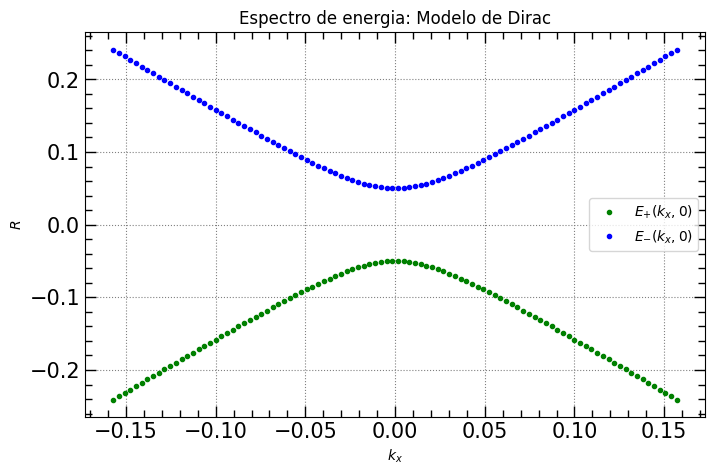

In [7]:
plt.figure(figsize = (8,5))

plt.plot(kx_list, E_list_0.real, 'g.', label = r'$E_{+}\left(k_x,0\right)$')
plt.plot(kx_list, E_list_1.real, 'b.', label = r'$E_{-}\left(k_x,0\right)$')

plt.xlabel(r'$k_x$')
plt.ylabel(r'$R$')
plt.title('Espectro de energia: Modelo de Dirac')
plt.legend(loc = 'best')

opt_plot()

Vamos gerar um gráfico de $F_n$ em função de $k_x$ para $k_y=0$:

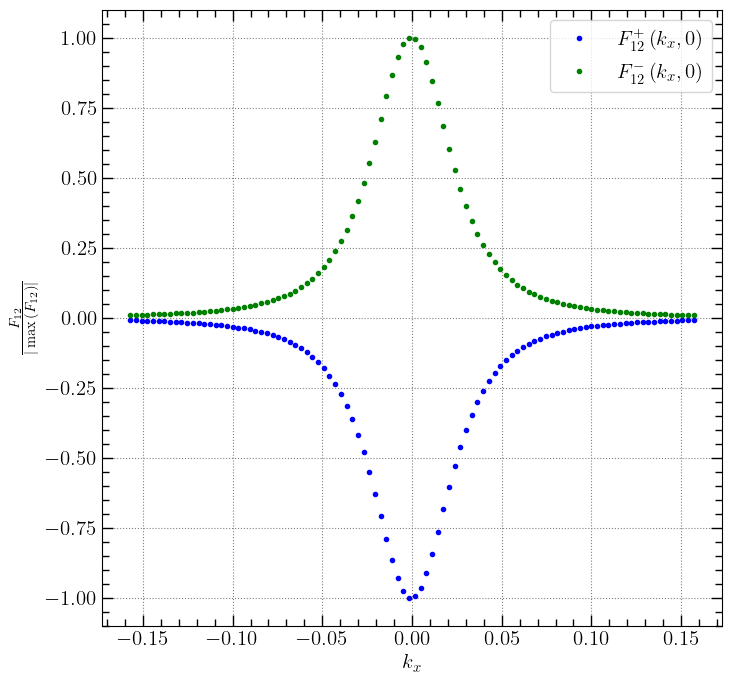

In [8]:
plt.figure(figsize = (8,8))

plt.plot(kx_list, F_list_0.real/max(abs(F_list_0)), '.b', label = r'$F_{12}^{+}\left(k_x,0\right)$')
plt.plot(kx_list, F_list_1.real/max(abs(F_list_1)), '.g', label = r'$F_{12}^{-}\left(k_x,0\right)$')

plt.xlabel(r'$k_x$')
plt.ylabel(r'$\frac{F_{12}}{|\max{\left(F_{12}\right)}|}$')
plt.legend(loc = 'best')

opt_plot()

Quando colocamos $\Delta=0$, observamos uma conexão entre as duas bandas em pontos chamados de *pontos de Dirac*. Chamamos sua estrutura de ampulheta de *cone de Dirac*. O componente $z$ da curvatura de Berry pode ser calculado para este modelo pela fórmula de Niu ou com a definição $(1.15)$:

$$\tag{2.3}
\boxed{\Omega_{z}^{\pm}\left(k_{x},k_{y},\Delta\right)=\mp\frac{1}{2}\frac{v_{F}^{2}}{\left(\sqrt{v_{F}^{2}k^{2}+\Delta^{2}}\right)^{3}}}\text{ }.
$$

Podemos então criar uma função que implemente numericamente o modelo analítico $\Omega_{z}^{\pm}$ da curvatura de Berry próximo dos pontos de Dirac:

In [9]:
def Omega(kx,ky, DP_x,DP_y, vF,Delta):
    return 1/2*vF**2*Delta/np.sqrt(vF**2*(kx - DP_x)**2 + vF**2*(ky - DP_y)**2 + Delta**2)**3


a = 1
vF = 1.5
Omega_list = np.zeros(len(kx_list))

i = 0
for kx in kx_list:
    Omega_list[i] = Omega(kx,ky, DP_x,DP_y, vF,Delta)
    i += 1

Podemos comparar o resultado numérico da fórmula de Niu para a curvatura de Berry para níveis baixos de energia:

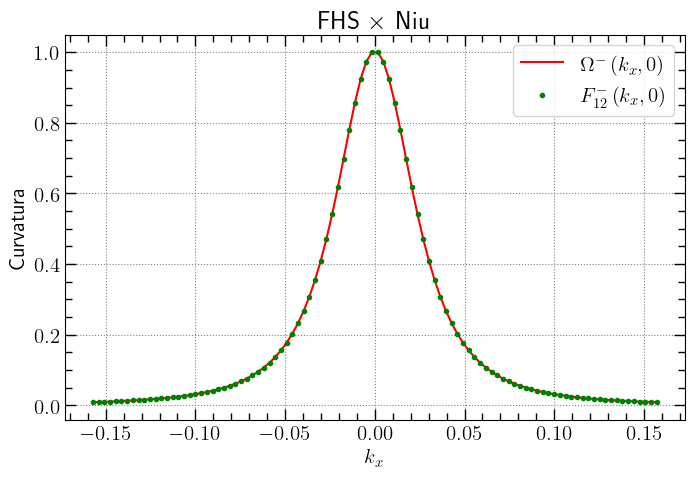

In [10]:
plt.figure(figsize = (8,5))

plt.plot(kx_list, Omega_list/max(Omega_list), '-r', label = r'$\Omega^{-}\left(k_x,0\right)$')
plt.plot(kx_list, Omega_list/max(Omega_list), '.g', label = r'$F_{12}^{-}\left(k_x,0\right)$')

plt.xlabel(r'$k_x$')
plt.ylabel(r'Curvatura')
plt.title(r'FHS $\times$ Niu')
plt.legend(loc = 'best')

opt_plot()

Note uma correspondência ideal com o algoritmo FHS e o resultado analítico.

### 2.2 Modelo de Honeycomb

A transformada de Fourier do Hamiltoniano do modelo Honeycomb é

$$\tag{2.4}
\tilde{H}_{HC}\left(k_{x},k_{y}\right)=\left(\begin{array}{cc}
\Delta & \sum_{i=1}^{3}t_{i}\cdot e^{i\boldsymbol{k}\cdot\boldsymbol{d}_{i}}\\
\sum_{i=1}^{3}t_{i}\cdot e^{-i\boldsymbol{k}\cdot\boldsymbol{d}_{i}} & -\Delta
\end{array}\right)\text{ },
$$

onde $\Delta$ é semelhante a uma massa e os $t_{i}$'s são os saltos ao longo das ligações dos $\boldsymbol{d}_{i}$ vetores entre os vizinhos mais próximos:

$$\tag{2.5}
\boldsymbol{d}_{1}=\frac{a}{2}\left(1,\sqrt{3}\right)\quad,\quad\boldsymbol
{d}_{2}=\frac{a}{2}\left(1,-\sqrt{3}\right)\quad,\quad\boldsymbol{d}_{3}=a\left(-1,0\right)\text{ },
$$

onde $a$ é o parâmetro de rede real – aqui, $a=1$. 

Analogamente ao que foi feito no modelo de Dirac, vamos criar uma função `H_Honeycomb()` que implementa o Hamiltoniano $H_{HC}$:

In [11]:
def H_Honeycomb(kx,ky, DP_x,DP_y, Delta):
    H_HC = 1j*np.zeros((2,2))
    a = 1
    t1 = 1
    t2 = 1
    t3 = 1
    t = np.array([t1,t2,t3])
    d1 = a/2*np.array([1,np.sqrt(3)])
    d2 = a/2*np.array([1,-np.sqrt(3)])
    d3 = a*np.array([-1,0])
    d = [d1,d2,d3]
    k = np.array([kx,ky])
    
    H_HC[0,0] = Delta 
    H_HC[1,1] = -Delta
    
    for i in range(len(t)):
        H_HC[1,0] += t[i]*np.exp(1j*np.dot(k,d[i])) 
        H_HC[0,1] += t[i]*np.exp(-1j*np.dot(k,d[i])) 
        
    return H_HC

Vamos calcular numericamente o espectro para o modelo de Honeycomb para $\Delta=1$:

In [12]:
dkx = 0.5*10**-1
dky = 10**-2
a = 1
vF = 1.5
Delta = 1

kx_list = np.arange(-np.pi/a, np.pi/a, dkx)

ky_list = np.array([2*np.pi/3/np.sqrt(3)/a])
E_list_0 = 1j*np.zeros((len(kx_list),len(ky_list)))
E_list_1 = 1j*np.zeros((len(kx_list),len(ky_list)))
F_list_0 = 1j*np.zeros((len(kx_list),len(ky_list))) 
F_list_1 = 1j*np.zeros((len(kx_list),len(ky_list))) 

start = time.time()

i = -1
j = 0
for kx in kx_list:
    i += 1
    j = 0
    for ky in ky_list:
        eigValues = linalg.eigh(H_Honeycomb(kx,ky, DP_x,DP_y, Delta))[0]
        E_list_0[i,j] = eigValues[0]
        E_list_1[i,j] = eigValues[1]
        F_list_0[i,j] = FHS(H_Honeycomb,0, kx,ky, dkx,dky, DP_x,DP_y, Delta)
        F_list_1[i,j] = FHS(H_Honeycomb,1, kx,ky, dkx,dky, DP_x,DP_y, Delta)
        j += 1
        
    
print("Tempo de execução:", time.time()-start, "segundos")

Tempo de execução: 0.10118341445922852 segundos


Graficamente, o espectro desse Hamiltoniano será:

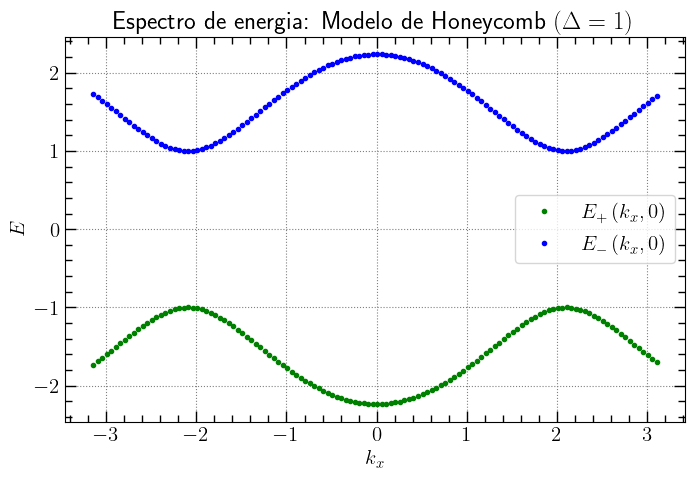

In [13]:
plt.figure(figsize = (8,5))

plt.plot(kx_list, E_list_0.real, '.g', label = r'$E_{+}\left(k_x,0\right)$')
plt.plot(kx_list, E_list_1.real, '.b', label = r'$E_{-}\left(k_x,0\right)$')

plt.xlabel(r'$k_x$')
plt.ylabel(r'$E$')
plt.title(r'Espectro de energia: Modelo de Honeycomb $(\Delta=1)$')
plt.legend(loc = 'best')

opt_plot()

Observamos os dois cones de Dirac em

$$\tag{2.6}
\boldsymbol{K}=\frac{2\pi}{3a}\left(1,\frac{1}{\sqrt{3}}\right)\quad,\quad\boldsymbol{K}'=\frac{2\pi}{3a}\left(-1,\frac{1}{\sqrt{3}}\right)\text{ }.
$$

Para $\Delta=0$, se desenvolvermos a fórmula da curvatura de Berry para o modelo Honeycomb em torno de um ponto de Dirac, iremos obter a fórmula do modelo de Dirac

$$\tag{2.7}
\Omega_{z}^{\pm}\left(k_{x},k_{y},K_{x},K_{y},\Delta\right)=\mp\frac{1}{2}\frac{v_{F}^{2}}{\left(\sqrt{v_{F}^{2}\left(\boldsymbol{k}-\boldsymbol{K}\right)^{2}}\right)^{3}}\text{ },
$$

Computacionalmente, de maneira análoga ao que tem sido feito até então, temos:

In [14]:
dkx = 0.5*10**-1
dky = 10**-2
a = 1
vF = 1.5
Delta = 0

kx_list = np.arange(-np.pi/a,np.pi/a,dkx)

ky_list = np.array([2*np.pi/3/np.sqrt(3)/a])
E_list_0 = 1j*np.zeros((len(kx_list),len(ky_list)))
E_list_1 = 1j*np.zeros((len(kx_list),len(ky_list)))
F_list_0 = 1j*np.zeros((len(kx_list),len(ky_list))) 
F_list_1 = 1j*np.zeros((len(kx_list),len(ky_list))) 

start = time.time()

i = -1
j = 0
for kx in kx_list:
    i += 1
    j = 0
    for ky in ky_list:
        eigValues = linalg.eigh(H_Honeycomb(kx,ky, DP_x,DP_y, Delta))[0]
        E_list_0[i,j] = eigValues[0]
        E_list_1[i,j] = eigValues[1]
        F_list_0[i,j] = FHS(H_Honeycomb,0, kx,ky, dkx,dky, DP_x,DP_y, Delta)
        F_list_1[i,j] = FHS(H_Honeycomb,1, kx,ky, dkx,dky, DP_x,DP_y, Delta)
        j += 1
        
    
print("Tempo de execução:", time.time()-start, "segundos")

Tempo de execução: 0.10164093971252441 segundos


Vamos verificar visualmente a afirmação acima ao comparar dos dois modelos em torno de $\boldsymbol{K}$:

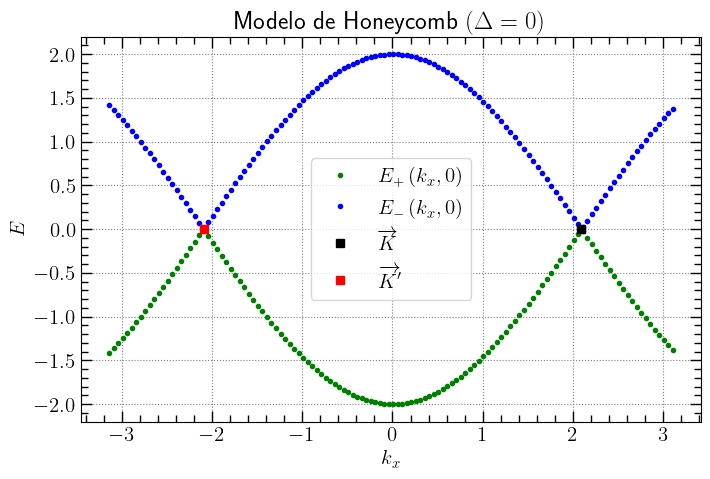

In [15]:
plt.figure(figsize = (8,5))

plt.plot(kx_list, E_list_0.real, '.g', label = r'$E_{+}\left(k_x,0\right)$')
plt.plot(kx_list, E_list_1.real, '.b', label = r'$E_{-}\left(k_x,0\right)$')
plt.plot(2/3*np.pi, np.max(F_list_1.imag), 'ks', label = '$\overrightarrow{K}$')
plt.plot(-2/3*np.pi, np.max(F_list_1.imag), 'rs', label = '$\overrightarrow{K\'}$')

plt.xlabel(r'$k_x$')
plt.ylabel(r'$E$')
plt.title(r'Modelo de Honeycomb $(\Delta=0)$')
plt.legend(loc = 'best')

opt_plot()

Vamos comparar a curvatura de Berry para o modelo de Honeycomb com a curvatura de Berry do modelo de Dirac como uma aproximação:

In [16]:
dkx = 10**-3
dky = 10**-3
a = 1

DP_x = 2*np.pi/3/a
DP_y = 2*np.pi/3/np.sqrt(3)/a

kx_list = np.arange(DP_x-0.05,DP_x+0.05,dkx)
# ky_list = np.arange(-np.pi/a,np.pi/a,dky) # 1/np.sqrt(3)
ky_list = np.array([DP_y])
E_list_0 = 1j*np.zeros((len(kx_list),len(ky_list)))
E_list_1 = 1j*np.zeros((len(kx_list),len(ky_list)))
F_list_0 = 1j*np.zeros((len(kx_list),len(ky_list))) 
F_list_1 = 1j*np.zeros((len(kx_list),len(ky_list))) 

Omega_list = np.zeros((len(kx_list),len(ky_list)))
Delta = 0.05
vF = 1.5

start = time.time()

i = -1
j = 0
for kx in kx_list:
    i += 1
    j = 0
    for ky in ky_list:
        # E_list_0[i,j] = linalg.eigh(H_Honeycomb(kx,ky, Delta))[0][0]
        # E_list_1[i,j] = linalg.eigh(H_Honeycomb(kx,ky, Delta))[0][1]
        F_list_0[i,j] = FHS(H_Honeycomb,0, kx,ky, dkx,dky, DP_x,DP_y, Delta)
        F_list_1[i,j] = FHS(H_Honeycomb,1, kx,ky, dkx,dky, DP_x,DP_y, Delta)
        Omega_list[i,j] = Omega(kx,ky, DP_x,DP_y, vF,Delta)
        
        j += 1      
        
print("Tempo de execução:", time.time()-start, "segundos")

Tempo de execução: 0.06227517127990723 segundos


Graficamente, temos:

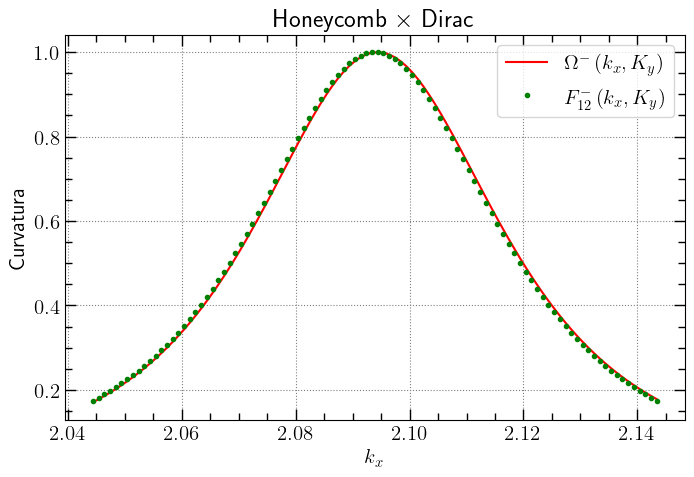

In [17]:
plt.figure(figsize = (8,5))

plt.plot(kx_list, Omega_list/abs(np.max(Omega_list.real)), '-r', label = r'$\Omega^{-}\left(k_x,K_y\right)$')
plt.plot(kx_list, F_list_1.real/abs(np.max(F_list_1.real)), '.g', label = r'$F_{12}^{-}\left(k_x,K_y\right)$')

plt.xlabel(r'$k_x$')
plt.ylabel(r'Curvatura')
plt.title(r'Honeycomb $\times$ Dirac')
plt.legend(loc = 'best')

opt_plot()

Note que há correspondência correta entre os dois gráficos, como já era de se esperar.

---

## 3. Modelo de Harper-Hofstadter  $(\phi=1/3)$

Agora ligamos um campo magnético. Revemos algumas modificações na zona de Brillouin. Em seguida, exploramos um exemplo específico do modelo de Harper-Hofstadter cujas condições são variadas nas arestas.

### 3.1 Estados de Bloch e zona magnética de Brillouin

Vamos pegar elétrons sem interação entre eles em um potencial periódico que forma uma rede retangular em duas dimensões, onde os parâmetros reais da rede são $a$ e $b$ nas direções $X$ e $y$, respectivamente. Impusemos uma periodicidade: a borda $x=0$ é identificada com a borda $x=\text{borda }L_{x}$ e o mesmo para $y=0$ e $y=\text{borda }L_{y}$. Assim, o sistema é invariante sob translações discretas$^{*}$ $\hat{T}_{a}$, $\hat{T}_{b}$ ao longo das direções $x$ e $y$ respectivamente, então obtemos $\left[\hat{H},\hat{T}_{a}\right]=\left[\hat{H},\hat{T}_{b}\right]=\left[\hat{T}_{a},\hat{T}_{b}\right]=0.$. As ações de $\hat{T}_{a}$ e $\hat{T}_{b}$ em um autoestado $\psi(x, y)$ de $\hat{H}$ são

$$\tag{3.1}
\hat{T}_{a}\psi\left(x,y\right)=\psi\left(x-a,y\right)\quad,\quad\hat{T}_{b}\psi\left(x,y\right)=\psi\left(x,y-b\right)\text{ }.
$$

$^{*}$**OBS**: Esses operadores de translação são unitários e são gerados pelo operador de impulsão em sua respectiva direção: $\hat{T}_{a}=e^{iP_{x}a}$ e $\hat{T}_{b}=e^{iP_{y}b}$.

Pelas relações de comutação, podemos encontrar uma base comum de autoestados para $\hat{H}$, $\hat{T}_{a}$ e $\hat{T}_{b}$. Como $\hat{T}_{a}$ e $\hat{T}_{b}$ são unitários, seus autovalores são fatores de fase $e^{i\alpha}$, $\alpha\in\mathbb{R}$. Então, se $\psi_{n,\boldsymbol{k}}$ é um dos autovetores, para um índice de energia da banda $n$, então

$$\tag{3.2}
\begin{cases}
\hat{T}_{a}\psi_{n,\boldsymbol{k}}\left(\boldsymbol{x}\right)=e^{ik_{x}a}\psi_{n,\boldsymbol{k}}\left(\boldsymbol{x}\right)=\psi_{n,\boldsymbol{k}}\left(x-a,y\right)\text{ },\\
\hat{T}_{b}\psi_{n,\boldsymbol{k}}\left(\boldsymbol{x}\right)=e^{ik_{y}a}\psi_{n,\boldsymbol{k}}\left(\boldsymbol{x}\right)=\psi_{n,\boldsymbol{k}}\left(x,y-b\right)\text{ },
\end{cases}
$$

para $k\in\mathbb{R}^{2}$. Isso sugere que

$$\tag{3.3}
\psi_{n,\boldsymbol{k}}=e^{ik\cdot x}u_{n,\boldsymbol{k}}\left(x\right)\quad,\quad u_{n,\boldsymbol{k}}\left(x\right)=u_{n,\boldsymbol{k}}\left(x−a, y\right)=u_{n,\boldsymbol{k}}\left(x, y−b\right)\text{ }.
$$

Um estado nesta forma é chamado de *estado de Bloch*. Além disso, notamos que mudando $k_{x}\rightarrow k_{x}+\frac{2\pi}{a}$ e $k_{y}\rightarrow k_{y}+\frac{2\pi}{b}$, o estado de Bloch permanece o mesmo. Portanto, é conveniente limitar nossa análise a $k_{x}\in\big(-\frac{\pi}{a},\frac{\pi}{a}\big]$ e $k_{y}\in\big(-\frac{\pi}{b},\frac{\pi}{b}\big]$.

A partir de agora, vamos introduzir os fatores de salto $t_{x}$ e $t_{y}$ entre os locais da rede nas direções $x$ e $y$, respectivamente, e vamos fazer uma aproximação de ligação forte$^{*}$ (do inglês, *tight-binding*), o que significa que os autoestados de posição $|\boldsymbol{x}\rangle$ estão restritos aos locais da rede $\boldsymbol{x}=\left(am, bn\right)$, $m,n\in\mathbb{Z}$. O Hamiltoniano é então dado por

$$\tag{3.4}
\hat{H}=-t_{x}\sum_{x,y}|x,y\rangle\langle x,y|-t_{y}\sum_{x,y}|x+a\hat{1}_{x},y\rangle\langle x,y+b\hat{1}_{y}|+h.c.\text{ }.
$$

$^{*}$**OBS**: A partícula só pode pular de um local para os vizinhos mais próximos. Este salto pode ser visto como um efeito de túnel

Vamos ligar agora um campo magnético uniforme $\boldsymbol{B}=B\hat{1}_{z}$, perpendicular à rede. O Hamiltoniano $H_{\text{cont.}}$ é então modificado desde que o campo vetorial $\boldsymbol{A}$ – cujo rotacional é o campo magnético – apareça nele. Se não considerássemos o *tight-binding*, teríamos de fato

$$\tag{3.5}
\hat{H}=\frac{1}{2m}\left(\boldsymbol{p}+e\boldsymbol{\boldsymbol{A}}\right)^{2}\text{ },
$$

onde $\boldsymbol{p}$ é o momento canônico. Definindo $\boldsymbol{\pi}=\boldsymbol{p}+e\boldsymbol{A}$, vemos que $\left[\pi_{x},\pi_{y}\right]=-ie\hbar B$. Para $\hat{T'}_{a}=e^{i\hat{\pi}_{x}a}$ e $\hat{T'}_{b}=e^{i\hat{\pi}_{y}b}$, vemos que

$$\tag{3.6}
\hat{T}'_{a}\hat{T}'_{b}=\hat{T}'_{a}\hat{T}'_{b}e^{ieBab/\hbar}\text{ },
$$

então $\hat{T}'_{a}$ e $\hat{T}'_{b}$ geralmente não se deslocam diariamente. No entanto, se você impor um fluxo magnético através de qualquer plaqueta tal que $Bab=\phi=n2\pi\hbar/e$ $(n\in\mathbb{Z})$, eles comutam novamente. Se você reintroduzir o *tight-binding* com as notações anteriores, obtemos

$$\tag{3.7}
\hat{H}=-t_{x}\sum_{x,y}|x,y\rangle e^{-ieaA_{x}\left(\boldsymbol{x}\right)/\hbar}\langle x+a\hat{1}_{x},y|-t_{y}\sum_{x,y}|x,y\rangle e^{-iebA_{y}\left(\boldsymbol{y}\right)/\hbar}\langle x,y+b\hat{1}_{y}|+h.c.\text{ }.
$$

Refefinindo $\hat{T}_{x}$ e $\hat{T}_{y}$ como sendo na forma

$$\tag{3.8}
\begin{cases}
\hat{T}_{x}=\sum_{x,y}|x,y\rangle e^{--eaA_{x}\left(\boldsymbol{x}\right)/\hbar}\langle x+a\hat{1}_{x},y|\text{ },\\
\hat{T}_{y}=\sum_{x,y}|x,y\rangle e^{-ieaA_{y}\left(\boldsymbol{x}\right)/\hbar}\langle x,y+b\hat{1}_{y}|\text{ },
\end{cases}
$$

obtemos então

$$\tag{3.9}
\hat{H}=-t_{x}\left(\hat{T}_{x}+\hat{T}_{x}^{\dagger}\right)-t_{y}\left(\hat{T}_{y}-\hat{T}_{y}^{\dagger}\right)\text{ }.
$$

Além disso, a relação $(3.6)$ ainda é válida, mas podemos ir além. Quando o fluxo é um múltiplo racional de $\Phi_{0}=2\pi\hbar/e$, ou seja, $\Phi=\frac{p}{q}\Phi_{0}$ com $p$ e $q$ inteiros que não compartilham nenhum divisor comum, podemos construir operadores de comutação por

$$\tag{3.10}
\left[\hat{T}_{x}^{n_{1}},\hat{T}_{y}^{n_{2}}\right]=0\text{},\quad\forall\quad\frac{p}{q}n_{1}n_{2}\in\mathbb{Z}\text{ }.
$$

Isso significa que podemos mais uma vez rotular os auto-estados de energia por seu autovalor em $\hat{T}_{y}$ e, simultaneamente, seu autovalor em $\hat{T}^{q}_{x}$ (se você escolher $n_{1}=q$, $n_{2}=1$, por exemplo). Eles são autoestados do tipo Bloch, satisfazendo

$$\tag{3.11}
\hat{H}|\boldsymbol{k}\rangle=E\left(\boldsymbol{\text{k}}\right)|\boldsymbol{k}\rangle\quad\text{com}\quad\hat{T}^{q}_{x}|\boldsymbol{k}\rangle=e^{iqk_{x}a}|\boldsymbol{k}\rangle\quad\wedge\quad\hat{T}_{y}|\boldsymbol{k}\rangle=e^{ik_{y}b}|\boldsymbol{\boldsymbol{k}}\rangle\text{ }.
$$

A consequência importante disso é a modificação da zona de Brillouin. Na verdade, vemos que o $e^{ikxqa}$ ainda é periódico, mas com um período de $\frac{2\pi}{a}$. Essa zona de Brillouin modificada é chamada de *zona magnética de Brillouin*:

$$\tag{3.12}
k_{x}\in\left[-\frac{\pi}{q},\frac{\pi}{q}\right]\qquad,\qquad k_{y}\in\left[-\pi,\pi\right]\text{ }.
$$

Sua área é $q$ vezes menor que a zona normal de Brillouin. A seguir, assumimos que $a=b=1$. Além disso, optamos pelo *gauge* $\boldsymbol{A}=\left(0, \frac{p}{q}\cdot2\pi x, 0\right)$. O Hamiltoniano então se torna$^{*}$,

$$\tag{3.13}
\hat{H}=-t_{x}\sum_{m,n}|m+1,n\rangle\langle m,n|-t_{y}\sum_{m,n}|m,n+1\rangle e^{2\pi mi\frac{p}{q}}\langle m,n|+hc\text{ }.
$$

$^{*}$**OBS**: Observe a discretização do espaço $\left(x, y\right) \rightarrow \left(m,n\right)$.

Antes de partir para o modelo de Harper-Hofstadter, vamos focar em uma pequena modificação no cálculo dos números de Chern, o que influencia na condutividade. É possível deduzir a condutividade de um estado a partir de sua curvatura de Berry associada. Podemos de fato partir da fórmula de Kubo para condutividade do $r$-ésimo autoestado, e após algumas simplificações – específicas para nossas discussões – obtemos

$$\tag{3.14}
\sigma_{yx}^{r}=ie^{2}\sum_{\alpha=0}^{r}\int_{\text{BZ}}\frac{\text{d}^{2}k}{\left(2\pi\right)^{2}}\left(\langle\partial_{k_{y}}u_{\boldsymbol{k}}^{\alpha}|\partial_{k_{x}}u_{\boldsymbol{k}}^{\alpha}\rangle-\langle\partial_{k_{x}}u_{\boldsymbol{k}}^{\alpha}|\partial_{k_{y}}u_{\boldsymbol{k}}^{\alpha}\rangle\right)\text{ },
$$

onde a soma é sobre os primeiros $r$ autoestados de energia (começamos da energia mais baixa). Conforme exigido pelo efeito Hall quântico, $\sigma_{yx}$ deve ser quantizado. Isso revela a natureza topológica desse efeito. Na verdade, mudando um pouco a definição dos números de Chern para sistema com campo magnético, encontramos que, para $\alpha=1,\ldots,q$:

$$\tag{3.15}
C_{\alpha}=\frac{1}{2\pi}\int_{\text{MBZ}}\text{d}\boldsymbol{k}\cdot\boldsymbol{\Omega}_{\boldsymbol{k}}^{\alpha}\quad\in\mathbb{Z}\text{ },
$$

então finalmente obtemos a chamada fórmula TKNN

$$\tag{3.16}
\sigma_{yx}^{r}=-\frac{e^{2}}{2\pi}\sum_{\alpha=0}^{r}C_{\alpha}\text{ }.
$$

Também ajustamos o algoritmo Fukui-Hatsugai-Suzuki a este modelo. Agora temos $k_{\ell}=\left(k_{j_{1}},k_{j_{2}}\right)$, $j_{\mu}=1,\ldots,N_{\mu}−1$ $\left(\mu=1,2\right)$. Assim, essas coordenadas $k_{\ell}$ representam a zona magnética de Brillouin já que $q_{\mu}$ é o denominador da fração do fluxo magnético$^{*}$ que você introduz no sistema (perpendicularmente à rede). De resto, é a mesma história: podemos calcular de forma semelhante $\tilde{F}_{12}$ e os números de Chern, apenas prestando atenção que a soma (integração discreta) é feita na zona magnética de Brillouin.

$^{*}$**OBS**: Poderíamos ter escolhido um medidor onde $q_{1}=p$ e $q_{2}=q$ são diferentes de $1$; algumas linhas acima, escolhemos $q_{1}=1$ e $q_{2}=q \in \mathbb{N}_{0}$.

### 3.2 Condições de contorno toroidais

Vamos manter condições de contorno periódicas em uma rede quadrada finita cujo comprimento e largura são $L_{x}$, na direção $x$, e $L_{y}$, na direção $y$. É relevante a transformação de Fourier do Hamiltoniano $(3.13)$ em ambas as direções, pois $k_{x}$ e $k_{y}$ são bons números quânticos. Isto leva a

$$\tag{3.17}
\hat{H}=\bigotimes_{k_{x},k_{y}}e^{i\boldsymbol{k}\cdot\boldsymbol{x}}\tilde{H}\left(k_{x},k_{y}\right)e^{-i\boldsymbol{k}\cdot\boldsymbol{x}}\text{ },
$$

$$\tag{3.18}
\hat{H}\left(k_{x},k_{y}\right)=\left(\begin{array}{ccccc}
-t_{x}2\cos\left(k_{x}\right) & 1 & 0 & \ldots & e^{iqk_{y}}\\
1 & -t_{x}2\cos\left(k_{x}+\frac{\pi}{2}\right) & 1 & \ldots & 0\\
0 & \ddots & \ddots & \ddots & \ldots\\
\vdots & \vdots & \ddots & \ddots & 1\\
e^{-iqk_{y}} & 0 & \ldots & 1 & -t_{x}2\cos\left[k_{x}+\frac{\left(q-1\right)\pi}{2}\right]
\end{array}\right)\text{ }.
$$

O Hamiltoniano acima é chamado de *Hamiltoniano de Bloch*. No nosso caso, e assim será no restante deste trabalho, optamos por $p=1$, $q=3$.

In [18]:
p = 1
q = 3
Lx = 10**2
Ly = 10**2
dkx = 2*np.pi/Lx
dky = 2*np.pi/Ly
kx_list = np.arange(-Ly/2,Ly/2,1)*dkx
ky_list = np.arange(-Ly/2,Ly/2,1)*dky/q

eigValues = 1j*np.zeros((len(kx_list), len(ky_list), q))

Vamos implementar numericamente o Hamiltoniano para o modelo de Hofstatder com condições de contorno toroidais:

In [19]:
def H_Hofstatder_tore(kx,ky, p,q):
    phi = p/q
    J = 1
    a = 1
    
    H = 1j*np.zeros((q,q))
    for i in range(q):
        H[i,i] = -J*2*np.cos(kx*a+i*2*np.pi*phi) 
        if (i>0 and i<q): 
            H[i,i-1] = -J
            H[i-1,i] = J      
            
    H[0,-1] = -J*np.exp(1j*q*a*ky)
    H[-1,0] = -J*np.exp(-1j*q*a*ky)    
    
    return H

Agora calcularemos o espectro de energia de nosso modelo:

In [20]:
start = time.time()

i = -1
j = 0
a = 1
for kx in kx_list:
    i += 1
    j = 0
    for ky in ky_list: 
        for l in range(q): 
            eigValues[i,j,l] = linalg.eigh(H_Hofstatder_tore(kx,ky, p,q))[0][l]       
        j += 1
        
    
print("Tempo de execução:", time.time()-start, "segundos")

Tempo de execução: 0.9450197219848633 segundos


Graficamente, temos então:

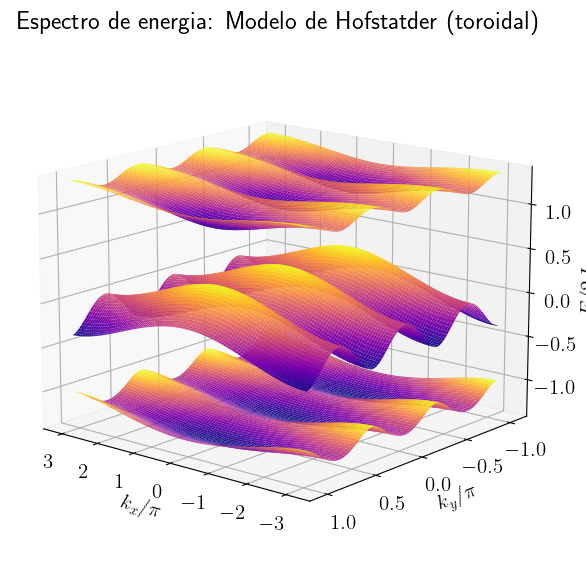

In [21]:
if (len(ky_list) == 1 or len(kx_list) == 1):
    pyplot.figure(figsize = (15,8))

    for l in range(q):
        # ax1.plot(kx_list,eigValues[:,:,l].real, 'b-', label = r'$E_0(k)$')
        ax1.plot(ky_list, eigValues[0,:,l].real, 'b-', label = r'$E_{0}\left(k\right)$')
    
    plt.xlabel(r'$k_y$')
    plt.ylabel(r'$E$')
    # plt.legend(loc = 'best');

if (len(ky_list) > 1 and len(kx_list) > 1):
    [Kx,Ky] = np.meshgrid(kx_list,ky_list)
    J = 1
    figE = plt.figure(figsize = (7,7))
    ax = plt.axes(projection = '3d')
    
    for l in range(q):
        ax.plot_surface(Kx, Ky, eigValues[:,:,l].real/(2*J), rstride = 1, cstride = 1,
                        cmap = 'plasma', edgecolor = 'none')
        ax.view_init(elev = 15, azim = 130)
    
    ax.set_xlabel(r'$k_x/\pi$')
    ax.set_ylabel(r'$k_y/\pi$')
    ax.set_zlabel(r'$E/2J$')
    ax.set_title(r'Espectro de energia: Modelo de Hofstatder (toroidal)')

Note que o espectro apresenta uma estrutura multicamadas e, obviamente, encontramos tantas camadas quanto o tamanho de $\tilde{H}$, ou seja, $q$ camadas conforme previsto pela teoria dos níveis de Landau.

Usando o algoritmo FHS, podemos calcular a curvatura de Berry $F$ associada a cada banda para cada par $(k_{x},k_{y})$. Semelhantemente ao que foi feito nas seções anteriores, podemos escrever uma função que implementa um algoritmo baseado no método FHS para uma única plaqueta para o modelo de Hofstatder:

In [22]:
def F_Hof(H,n, kx,ky, dkx,dky, p,q): 
    eigV_0 = linalg.eigh(H_Hofstatder_tore(kx,ky, p,q))[1][:,n]
    eigV_1 = linalg.eigh(H_Hofstatder_tore(kx+dkx,ky, p,q))[1][:,n]
    eigV_2 = linalg.eigh(H_Hofstatder_tore(kx+dkx,ky+dky, p,q))[1][:,n]
    eigV_3 = linalg.eigh(H_Hofstatder_tore(kx,ky+dky, p,q))[1][:,n]
    
    U_01 = U_calc(eigV_0,eigV_1)
    U_12 = U_calc(eigV_1,eigV_2)
    U_23 = U_calc(eigV_2,eigV_3)
    U_30 = U_calc(eigV_3,eigV_0)
    
    return (np.log(U_01*U_12*U_23*U_30)/dkx/dky).imag

Analogamente ao que foi feito acima, vamos calcular a curvatura de Berry $F$ associada a cada banda para cada par $(k_{x},k_{y})$ usando o método de Niu (a função `dH_d_Hof` é relacionada ao Hamiltoniano do modelo de Hofstatder):

In [23]:
def dH_d_Hof(kx,ky,p,q):     
    dH_dkx = 1j*np.zeros((q,q))
    dH_dky = 1j*np.zeros((q,q))
    a = 1
    J = 1
    
    for i in range(q):
        dH_dkx[i,i] = 2*J*a*np.sin(a*kx+i*2*np.pi*p/q)
        # ATENÇÃO: existe uma diferença entre ref Hafezi-Goldman vs Dalibard.
        #if (i>0 and i<q):    
         #   dH_dky[i,i-1] = 1j*J*a*np.exp(-1j*ky*a)   
          #  dH_dky[i-1,i] = -1j*J*a*np.exp(1j*ky*a)
    
    dH_dky[0,-1] = -q*J*1j*a*np.exp(q*1j*a*ky)
    dH_dky[-1,0] = q*J*1j*a*np.exp(-q*1j*a*ky)
    
    return dH_dkx,dH_dky



def F_Niu_Hof(H_Hofstatder_tore,n, kx,ky, p,q):
    F_Niu_n = 0 
    eigValues = linalg.eigh(H_Hofstatder_tore(kx,ky, p,q))[0]
    eigVectors = linalg.eigh(H_Hofstatder_tore(kx,ky, p,q))[1]
    En = linalg.eigh(H_Hofstatder_tore(kx,ky, p,q))[0][n]
    eigVectors_n = linalg.eigh(H_Hofstatder_tore(kx,ky, p,q))[1][:,n]
    
    deriv_H = dH_d_Hof(kx,ky, p,q)
    dH_dkx = deriv_H[0]
    dH_dky = deriv_H[1]
    
    for n_prime in range(len(eigVectors)):
        if (n_prime != n):
            eigVectors_n_prime = eigVectors[:,n_prime]
            En_prime = eigValues[n_prime]
            
            temporary1 = braket(eigVectors_n, dH_dkx, eigVectors_n_prime)
            temporary2 = braket(eigVectors_n_prime, dH_dky, eigVectors_n)
            F_Niu_n +=  (temporary1*temporary2-np.conj(temporary1*temporary2))/(En-En_prime)**2/1j
            
    return F_Niu_n

Comparemos esses resultados plotados com os obtidos com o método de Niu:

- **Método FHS**:

In [24]:
p = 1
q = 3
Lx = 10**2
Ly = 10**2
dkx = 2*np.pi/Lx
dky = 2*np.pi/Ly/q 
kx_list = np.arange(-Lx/2, Lx/2, 1)*dkx
ky_list = np.arange(0, Ly, 1)*dky

Fs = 1j*np.zeros((len(kx_list), len(ky_list), q))

i = -1
for kx in kx_list:
    i += 1
    j = -1
    for ky in ky_list:
        j += 1        
        for l in range(q): 
            Fs[i,j,l] = F_Hof(H_Hofstatder_tore,l, kx,ky, dkx,dky, p,q)

- **Método de Niu**:

In [25]:
F_Niu_s = 1j*np.zeros((len(ky_list), q))

i = 0
for ky in ky_list:
    for l in range(q):
        F_Niu_s[i,l] = F_Niu_Hof(H_Hofstatder_tore,l, kx_list[0],ky, p,q)
    i += 1

Com base nisso, vamos visualizar graficamente uma comparação entre a curvatura de Berry obtida com o método de Niu $(\Omega)$ eo algoritmo FHS $(F)$ para $\ell=1,2,3$, correspondente às três bandas do espectro $(q=3)$:

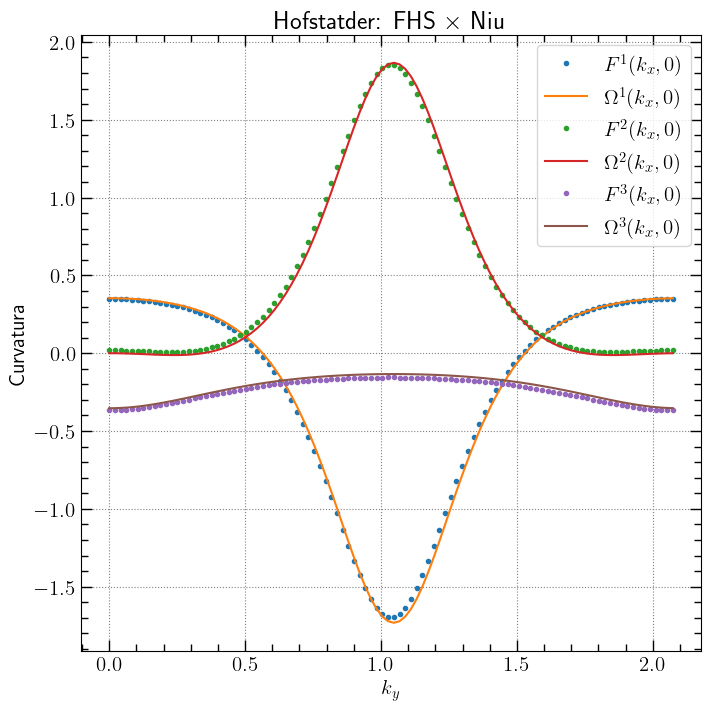

In [26]:
ax1 = plt.figure(figsize = (8,8))

ax1 = plt.subplot(111)
for l in range(q):
    ax1.plot(ky_list,Fs[0,:,l].real, '.', label = r'$F^{:d}(k_x,0)$'.format(l+1))
    ax1.plot(ky_list,F_Niu_s[:,l].real, '-', label = r'$\Omega^{:d}(k_x,0)$'.format(l+1)) 
        
ax1.set_xlabel(r'$k_y$')
ax1.set_ylabel(r'Curvatura')
ax1.set_title(r'Hofstatder: FHS $\times$ Niu')
ax1.legend(loc = 'best')

opt_plot()

Podemos ver que não há correspondência perfeita entre os dois resultados. Observe que a curvatura local obtida da fórmula de Niu, $\Omega$, é analítica enquanto a curvatura local obtida do método FHS, $F$, depende da precisão do algoritmo, pois você precisa de uma plaqueta da zona de Brillouin, cujo tamanho depende do discretização, para avaliá-lo em um ponto.

Avaliemos agora a evolução da diferença entre $\Omega$ e $F$ em função de $L_{y}$:

In [27]:
dky_list = np.array([10**-6, 10**-5, 10**-4, 10**-3, 10**-2])
diff_curv = 1j*np.zeros((len(dky_list), q))
i = 0
for dky in dky_list:
    for l in range(q):
        diff_curv[i,l] = F_Niu_Hof(H_Hofstatder_tore,l, kx_list[0],ky_list[int(len(ky_list)/2)], p,q)\
                       - F_Hof(H_Hofstatder_tore,l, kx_list[0],ky_list[int(len(ky_list)/2)], dkx,dky, p,q)
    i += 1

Vamos plotar a diferença absoluta entre a curvatura obtida com o algoritmo FHS $(F^{\ell})$ e a calculada com a fórmula de Niu $(\Omega^{\ell})$ $(\ell=1,2,3)$ para uma discretização diferente da zona de Brillouin:

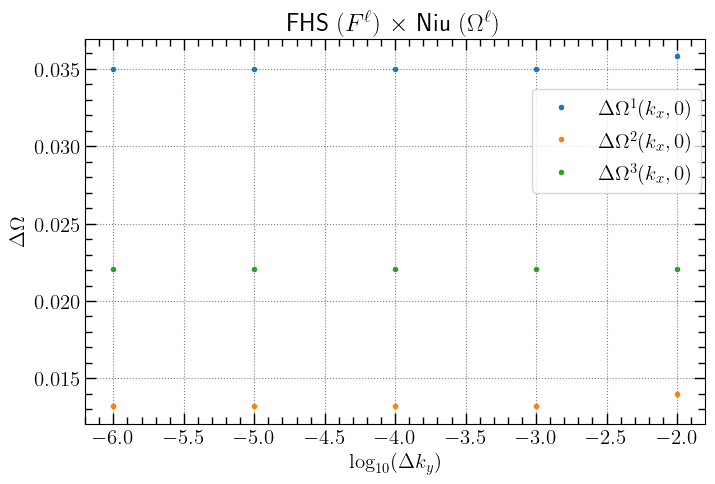

In [28]:
plt.figure(figsize = (8,5))

ax1 = plt.subplot(111)
for l in range(q):
    ax1.plot(np.log10(dky_list), abs(diff_curv[:,l].real), '.', label = r'$\Delta \Omega^{:d}(k_x,0)$'.format(l+1)) 
ax1.set_xlabel(r'$\log_{10}(\Delta k_y)$')
ax1.set_ylabel(r'$\Delta\Omega$')
ax1.set_title(r'FHS $(F^{\ell})$ $\times$ Niu $(\Omega^{\ell})$')

ax1.legend(loc = (0.72, 0.6))
opt_plot()

Infelizmente, como pode ser visto no gráfico acima, a diferença entre esses dois não converge para $0$, mas para um valor finito. Tal problema ainda não foi solucionado pelo autor deste `Notebook`. 

Para calcularmos os números de Chern, podemos escrever a seguinte função:

In [29]:
def Chern(n,F_Hof, kx_list,ky_list, dkx,dky, p,q):
    chern_n = 0
    for kx in kx_list:
        for ky in ky_list:
            chern_n += F_Hof(H_Hofstatder_tore,n, kx,ky, dkx,dky, p,q)*dkx*dky
            
    return chern_n

Implementando a função `Chern` para o cálculo numérico dos números de Chern obtemos:

In [30]:
start = time.time()

p = 1
q = 3
dkx = 2*np.pi/100
dky = 2*np.pi/100/q
# np.arange() não contém o limite superior
kx_list = np.arange(-np.pi, np.pi, dkx)    
ky_list = np.arange(0,2*np.pi/q, dky)
cherns = 1j*np.zeros(q)

for i in range(q):
    cherns[i] = Chern(i,F_Hof,kx_list,ky_list,dkx,dky,p,q)

print("Tempo de execução:", time.time()-start, "segundos")
print('Números de Chern =', (cherns/2/np.pi).real)

Tempo de execução: 4.237786054611206 segundos
Números de Chern = [-1.  2. -1.]


Os números Chern correspondentes a cada banda são $−1$, $2$, $−1$ ($2$ é para o do meio). O fato de não desaparecerem significa que estamos diante de um estado topológico da matéria.

### 3.3 Condições de contorno cilindrícas

Removemos a periodicidade apenas na direção $x$. Isso significa que obtemos uma amostra de vácuo de junção nos dois lados da amostra. Assim, aplicamos a transformada de Fourier apenas na direção $y$ e obtemos, para $\phi=p/q$,

$$
\hat{H}=-t_{x}\sum_{m,k_{y}}|m+1,k_{y}\rangle\langle m,k_{y}|-t_{y}\sum_{m,k_{y}}|m,k_{y}\rangle e^{-ik_{y}+2\pi mi\phi}\langle m,k_{y}|+h.c.\text{ },
$$

$$\tag{3.19}
\therefore\quad\hat{H}=-t_{x}\sum_{m,k_{y}}\left(|m+1,k_{y}\rangle\langle m,k_{y}|+h.c.\right)-2t_{y}\sum_{m,k_{y}}|m,k_{y}\rangle\langle m,k_{y}|\cos\left(k_{y}-2\pi m\phi\right)=\sum_{k_{y}}\hat{H}\left(k_{y}\right)\text{ }.
$$

com $m=0,\ldots,L_{x}-1$ e $k_{y}\in\big(-\frac{\pi}{q},\frac{\pi}{q}\big]$; A partir disso, deduzimos que

$$\tag{3.20}
\hat{H}\left(k_{y}\right)=\left(\begin{array}{ccccc}
-2t_{y}\cos\left(k_{y}\right) & -t_{x} & 0 & \ldots & 0\\
-t_{x} & -2t_{y}\cos\left(k_{y}-2\pi\phi\right) & -t_{x} & \ldots & 0\\
\vdots & \vdots & \vdots & \ddots & -t_{x}\\
0 & 0 & \ldots & -t_{x} & -2t_{y}\cos\left[k_{y}-2\pi\phi\left(L_{x}-1\right)\right]
\end{array}\right)\text{ }.
$$

Este é aparentemente um problema $1-\text{D}$ ao longo do eixo $x$. Para encontrar todo o espectro de $\hat{H}$, podemos calcular o espectro de $\hat{H}\left(k_{y}\right)$ para cada $k_{y}$. Obtemos uma estrutura de bandas como iremos apresentar adiante. Além disso, implementamos o *Método da Matriz de Transferência*, introduzido por Hatsugai, que nos permite determinar apenas a energia associada aos estados de borda. Podemos implementar tal método da seguinte forma:

In [31]:
def En_edge(E,ky,p,q,Ly,Phi):
    
    phi = p/q
    r = 1 # r = J_1/J_2
    
    M = np.eye(2)
    for m in range(1,q+1):
        M = sp.Matrix([[-E-2*r*np.cos(ky-2*np.pi*(Phi/Ly+phi*m)+np.pi),-1], [1,0]])*M 
    eigValues_M = sp.solve(M[1,0],E)
    
    return eigValues_M

Baseado nisso, podemos determinar numericamente a energia associada aos estados de borda para o modelo de Hofstatder dada as condições cilindrícas:

In [32]:
E = sp.Symbol('E')

p = 1
q = 3

Phi = 0

Ly = 192
dky = 2*np.pi/Ly

ky_list = np.arange(-np.pi, np.pi, dky)

eigValues_edge = 1j*np.zeros((len(ky_list), q-1))
i = 0

start = time.time()

for ky in ky_list:
    eigValues_edge[i,:] = En_edge(E, ky, p, q, Ly, Phi)
    i += 1
    
print("Tempo de execução:", time.time()-start, "segundos")

Tempo de execução: 20.21709370613098 segundos


Graficamente, podemos analisar os estados de borda $E_{\text{edge}}$ em função de $k_{y}$ com base nos cálculos feitos na célula acima:

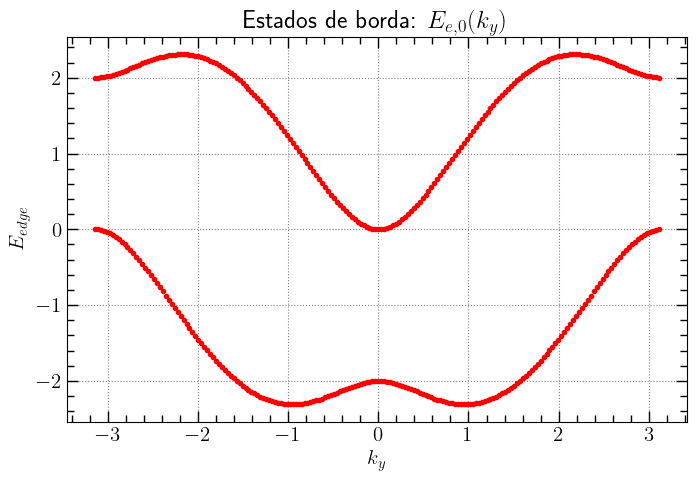

In [33]:
plt.figure(figsize = (8,5))
ax1 = plt.subplot(111)

for l in range(q-1):
    ax1.plot(ky_list,eigValues_edge[:,l].real, 'r.', label = r'$E_{edge,0}(k_y)$')    

ax1.set_xlabel(r'$k_y$')
ax1.set_ylabel(r'$E_{edge}$')
ax1.set_title(r'Estados de borda: $E_{e,0}(k_{y})$')

opt_plot()

Vamos definir uma função que aplicar as condições de contorno cilindrícas ao Hamiltoniano do modelo de Hofstatder:

In [34]:
def H_Hofstatder_cylind(Lx,Ly, ky, p,q, Phi): 
    tx = 1
    ty = 1
    phi = p/q
    
    H_ky = np.zeros((Lx,Lx))
    
    # Aqui, m é a coordenada do espaço real e vai de 0 a Lx-1. 
    # O intervalo da função não leva a última entrada no vetor criado
    for m in range(Lx):    
                             
            
       # O próximo é do livro de Bernevig e do artigo de Hatsugai:
       # ATENÇÃO a este termo extra 1/2 !!!!!!!!!
        H_ky[m,m] = -2*ty*np.cos(ky-2*np.pi*phi*(m-1/2)-2*np.pi*Phi/Ly) 
        
        if (m<Lx-1):
            H_ky[m,m+1] = -tx
            H_ky[m+1,m] = -tx
                
    return H_ky

Agora calculamos numericamente o nosso modelo dada nossas condições de contorno:

In [35]:
p = 1
q = 3

Lx = 200
Ly = 192
Phi = 0

dky = 2*np.pi/Ly
ky_list = np.arange(-np.pi, np.pi, dky)
# ky_list = np.arange(0,2*np.pi,dky)

eigValues = 1j*np.zeros((Lx, len(ky_list)))

start = time.time()

j = 0
for ky in ky_list:        
    eigValues[:,j] = linalg.eigh(H_Hofstatder_cylind(Lx,Ly, ky, p,q, Phi))[0]
    j += 1
    
print("Tempo de execução:", time.time()-start, "segundos")

Tempo de execução: 4.703003168106079 segundos


Vamos gerar o espectro dos estados de borda para o Hamiltoniano de Hofstatder dada as condições cilindrícas:

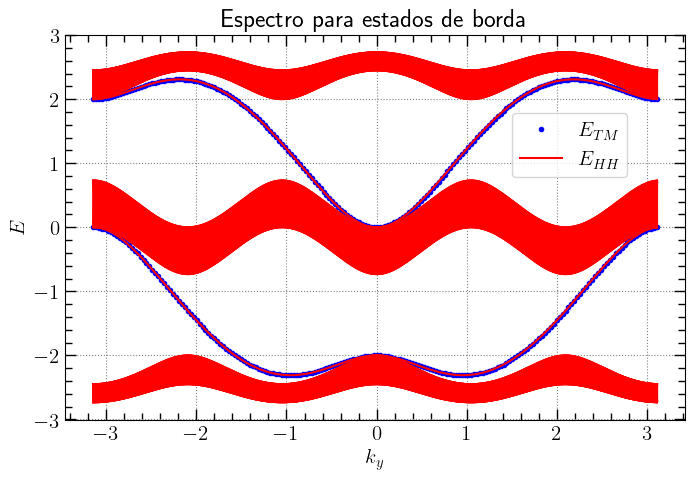

In [36]:
plt.figure(figsize = (8,5))
ax1 = plt.subplot(111)

for l in range(q-2):
    ax1.plot(ky_list, eigValues_edge[:,l].real, 'b.') 
ax1.plot(ky_list, eigValues_edge[:,-1].real, 'b.', label = r'$E_{TM}$')    
    
ax1.set_xlabel(r'$k_y$')
ax1.set_ylabel(r'$E$')

for l in range(Lx-1):
    ax1.plot(ky_list,eigValues[l,:].real, 'r-')
ax1.plot(ky_list,eigValues[-1,:].real, 'r-', label = r'$E_{HH}$') 
    
ax1.set_xlabel(r'$k_y$')
ax1.set_ylabel(r'$E$')
ax1.set_title(r'Espectro para estados de borda')
   
ax1.legend(loc = (0.72, 0.63))
opt_plot()

Ao sobrepor os estados de borda obtidos com ambos os métodos, vemos que ele se encaixa corretamente (com uma pequena modificação no código, sem esse pequeno truque, os gráficos dos dois métodos não combinam perfeitamente).

Vamos passar para os estados de borda. Quando escolhemos um valor específico de $k_{y}$, obtemos tantos valores de energia quanto o número de sítios ao longo da direção $x$.

In [37]:
p = 1
q = 3

Lx = 200
Ly = 192
Phi = 0

ky = 1

start = time.time()

eigValues,eigVectors = linalg.eigh(H_Hofstatder_cylind(Lx,Ly, ky, p,q, Phi))

print("Tempo de execução:", time.time()-start, "segundos")

Tempo de execução: 0.030530929565429688 segundos


Vamos gerar dois gráficos. O primeiro (esquerda) será o espectro de energia para condições de contorno cilíndricas para o modelo de Hofstadter $1/3$ para $k_{y}=1$. Já o segundo (direita) apresentará os valores absolutos dos componentes dos estados correspondentes às energias nos *gaps* (que indicaremos por pequenas estrelas) apresentados no gráfico da esquerda com cores de correspondência.

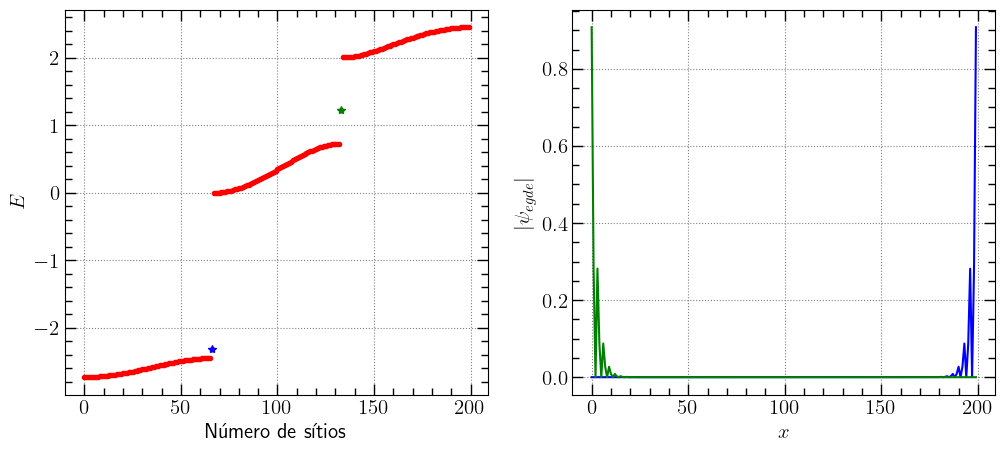

In [38]:
plt.figure(figsize = (12, 5))

ax1 = plt.subplot(121)
ax1.plot(eigValues.real, 'r.') 
ax1.plot(int(Lx/3), eigValues.real[int(Lx/3)], 'b*') 
ax1.plot(2*int(Lx/3)+1, eigValues.real[2*int(Lx/3)+1], 'g*') 

ax1.set_xlabel(r'Número de sítios')
ax1.set_ylabel(r'$E$')
opt_plot()
# ax1.legend()

ax2 = plt.subplot(122)
ax2.plot(abs(eigVectors[:,int(Lx/3)]), 'b-') 
ax2.plot(abs(eigVectors[:,int(Lx/3)*2+1]), 'g-') 

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$|\psi_{egde}|$')
opt_plot()
# ax2.legend()

Vemos claramente que os dois estados associados às duas energias que se encontram nos *gaps* (lacunas) estão maioritariamente localizados nas bordas da amostra.

### 3.4 Condições de contorno abertas

Agora não impomos nenhuma periodicidade. Nosso Hamiltoniano, dado por $(3.13)$, é uma matriz complexa $\left(L_{x}\times L_{y}\right)\times\left(L_{x}\times L_{y}\right)$

$$\tag{3.21}
H=\left(\begin{array}{cccc}
-t_{y}\sum_{n}|0,n+1\rangle\langle0,n|+h.c. & -t_{x}\sum_{n}|0,n\rangle\langle1,n|+h.c. & 0 & \ldots\\
-t_{x}\sum_{n}|1,n\rangle\langle0,n|+h.c. & -t_{y}\sum_{n}e^{i2\pi\phi}|1,n+1\rangle\langle1,n|+h.c. & -t_{x}\sum_{n}|1,n\rangle\langle2,n|+h.c. & \ldots\\
0 & -t_{x}\sum_{n}|2,n\rangle\langle1,n|+h.c. & \ddots & \ddots\\
\vdots & \ddots & \ddots & \ddots
\end{array}\right)\text{ },
$$

uma vez que expressamos os estados do sistema na base

$$\tag{3.22}
\psi=\sum_{m,n}|m,n\rangle\langle m,n|\text{ }.
$$

Note ainda que

$$\tag{3.23}
-t_{y}e^{i2\pi\phi m}\sum_{n}|m,n+1\rangle\langle m,n|+h.c.=\left(\begin{array}{cccc}
0 & -t_{y}e^{i2\pi\phi m} & 0 & \ldots\\
-t_{y}e^{-i2\pi\phi m} & 0 & -t_{y}e^{i2\pi\phi m} & \ddots\\
0 & -t_{y}e^{-i2\pi\phi m} & 0 & \ddots\\
0 & 0 & \ddots & \ddots\\
\vdots & \vdots & \vdots & \ddots
\end{array}\right)\text{ },
$$

$$\tag{3.24}
-t_{x}\sum_{n}|m+1,n\rangle\langle m,n|+h.c.=\left(\begin{array}{cccc}
-t_{x} & 0 & 0 & \ldots\\
0 & -t_{x} & 0 & \ldots\\
\vdots & \ddots & \ddots & \ddots
\end{array}\right)\text{ }.
$$

Estas duas últimas matrizes contêm elementos complexos $L_{y} \times L_{y}$ e são obviamente Hermitianas. Vamos calcular os autovalores desse sistema e os apresentar graficamente. 

Analogamente ao que foi feito nas seções anteriores, vamos definir uma função que retorna o Hamiltoniano do modelo de Hofstatder dada as condições de contorno abertas. Para isso, nossa função deverá construir uma matriz com matrizes de blocos $L_{x}$ onde cada uma delas é uma matriz $L_{y}\times L_{x}$: 

In [39]:
def H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly):    
    phi = p/q
    H = 1j*np.zeros((Lx*Ly,Lx*Ly))
    
    for m in positions_x:
        for n in positions_y:
            
            if (m<Lx-1):
                H[n+(m+1)*Lx,n+m*Lx] = -tx
                H[n+m*Lx,n+(m+1)*Lx] = -tx
                
            if (n<Ly-1):
                H[(n+1)+m*Lx,n+m*Lx] = -ty*np.exp(1j*2*np.pi*phi*m)
                H[n+m*Lx,(n+1)+m*Lx] = -ty*np.exp(-1j*2*np.pi*phi*m)
        
    return H

Vamos agora definir uma matriz que transforma um vetor com $n^2$ linhas em uma matriz quadrada de ordem $n$:

In [40]:
def vector2matrix(vector):
    l = int(np.sqrt(len(vector)))
    matrix = 1j*np.zeros((l,l))
    k = 0
    for i in range(l):
        for j in range(l):
            matrix[i,j] = vector[k]
            k += 1
    return matrix

# Teste
vector2matrix(np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]))

array([[ 1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j],
       [ 5.+0.j,  6.+0.j,  7.+0.j,  8.+0.j],
       [ 9.+0.j, 10.+0.j, 11.+0.j, 12.+0.j],
       [13.+0.j, 14.+0.j, 15.+0.j, 16.+0.j]])

Podemos também definir a operação inversa, ou seja, uma matriz que transforma uma matriz quadrada de ordem $n$ em um vetor com $n^2$ linhas:

In [41]:
def matrix2vector(matrix):
    N1 = len(matrix)
    N2 = len(matrix[0])
    vector = 1j*np.zeros(N1*N2)
    k = 0
    for i in range(N1):
        for j in range(N2):
            vector[k] = matrix[i,j]
            k += 1
            
    return vector

Dessa forma, podemos calcular numericamente nosso modelo para tais condições de contorno:

In [42]:
Lx = 30
Ly = 30

p = 1
q = 3
J = 1
tx = J
ty = J

positions_x = np.arange(0,Lx,1)
positions_y = np.arange(0,Ly,1)
x, y = np.meshgrid(range(Lx+1),range(Ly+1))

eigValues,eigVectors = linalg.eigh(H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly))   

number = np.arange(0,Lx*Ly,1)
E_F = -1.5*np.ones(len(number))


# Para selecionar quantos estados de borda quiser. 
# Pode ser alterado para obter uma sobreposição com a função delta em torno de 0.8
s = 6 

# Para selecionar os autoestados/autovetores na matriz eigVectors
l1 = np.arange(int(Lx*Ly/q)-s-4,int(Lx*Ly/q)+s,1)    
l2 = np.arange(int((q-1)*Lx*Ly/q)-s,int((q-1)*Lx*Ly/q)+s+4,1) 
edgeStates_gap1 = 1j*np.zeros((len(l1),Lx,Lx))
edgeStates_gap2 = 1j*np.zeros((len(l2),Lx,Lx))

k = 0
for i in l1:
    edgeStates_gap1[k] = vector2matrix(eigVectors[:,i])
    k += 1

k = 0    
for i in l2:
    edgeStates_gap2[k] = vector2matrix(eigVectors[:,i])
    k += 1

Plotemos agora o espectro do Hamiltoniano $(3.13)$. Vamos indicar os autovalores potencialmente associados a estados de borda pelas cores vermelho e verde:

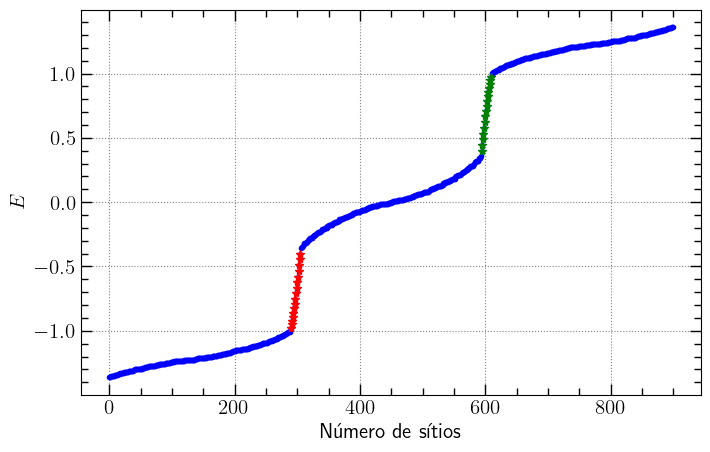

In [43]:
plt.figure(figsize = (8,5))

ax1 = plt.subplot(111)
ax1.plot(eigValues.real/2/J, 'b.', label = r'$k_{y}=1$')
for i in l1:
    ax1.plot(i,eigValues[i].real/2/J, 'r*', label = r'$\ell_{1}=300$')
for i in l2:
    ax1.plot(i,eigValues[i].real/2/J, 'g*', label = r'$\ell_{2}=600$')

ax1.set_xlabel(r'Número de sítios')
ax1.set_ylabel(r'$E$')

opt_plot()

Note que essa estrutura em escada que pode ser útil para detectar os estados de borda. Vamos plotar dois estados correspondentes a um autovalor no *gap* inferior (esquerda) e um no *gap* superior (direita):

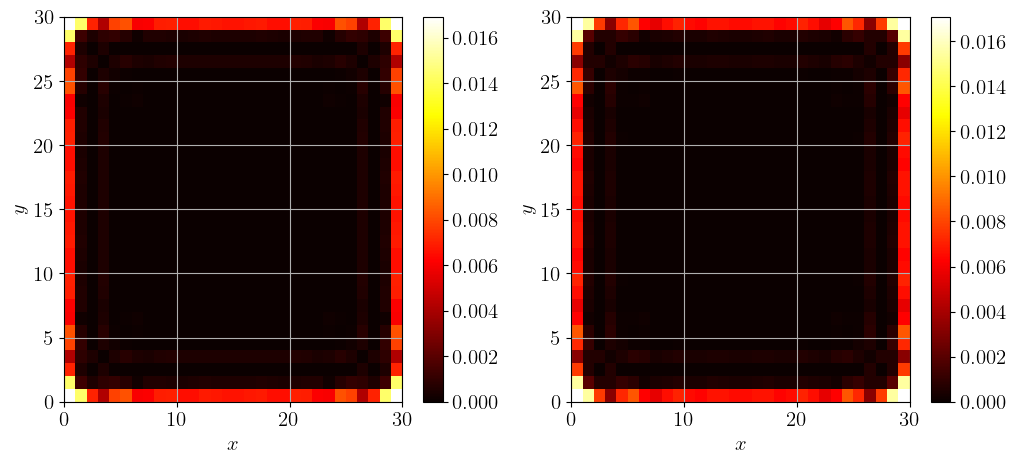

In [44]:
fig = plt.figure(figsize = (12,5))

ax2 = plt.subplot(121)
im = ax2.pcolormesh(x, y, abs(edgeStates_gap1[int(len(edgeStates_gap1)/2)-6])**2,
                    cmap = 'hot', vmin = 0., linewidth = 0, rasterized = True)
fig.colorbar(im, ax = ax2)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.grid(axis = 'both')

ax3 = plt.subplot(122)
im = ax3.pcolormesh(x, y, abs(edgeStates_gap2[int(len(edgeStates_gap2)/2)+s])**2, 
                    cmap = 'hot', vmin = 0., linewidth = 0, rasterized = True)
fig.colorbar(im, ax = ax3)

ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')
ax3.grid(axis = 'both')

Ao selecionar um autovalor em cada intervalo, podemos ver que o estado associado está, na verdade, localizado principalmente nas bordas, conforme pode ser visto no gráfico acima.

---

## 4. Dinâmica

Para observar as correntes de borda, usamos o sistema de condições de contorno aberto. Implementamos dois estados iniciais diferentes, uma função $\delta$ e uma sobreposição com uma gaussiana, e os deixamos evoluir no tempo. Em relação à função $\delta$, escolhemos colocar um elétron nas coordenadas $\left(x_{0}, y_{0}\right)$ onde a sobreposição entre a função $\delta$ e um dos vários estados de borda é a mais alta possível.

In [45]:
psi_0 = 1j*np.zeros((Lx*Ly))
psi_0[-1] = 1

t1 = 0
psi_t1 = np.dot(sp_linalg.expm(-1j*t1*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)),psi_0)
psi_t1 = vector2matrix(psi_t1)

t2 = 10
psi_t2 = np.dot(sp_linalg.expm(-1j*t2*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)),psi_0)
psi_t2 = vector2matrix(psi_t2)

print('50% feito...')

#################################

t3 = 20
psi_t3 = np.dot(sp_linalg.expm(-1j*t3*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)),psi_0)
psi_t3 = vector2matrix(psi_t3)

t4 = 40
psi_t4 = np.dot(sp_linalg.expm(-1j*t4*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)),psi_0)
psi_t4 = vector2matrix(psi_t4)

print('100 % feito!')

50% feito...
100 % feito!


Em seguida, plotamos o estado normalizado em momentos diferentes e com isso obtemos a seguinte figura:

Text(2, -0.17, '$t = 40$')

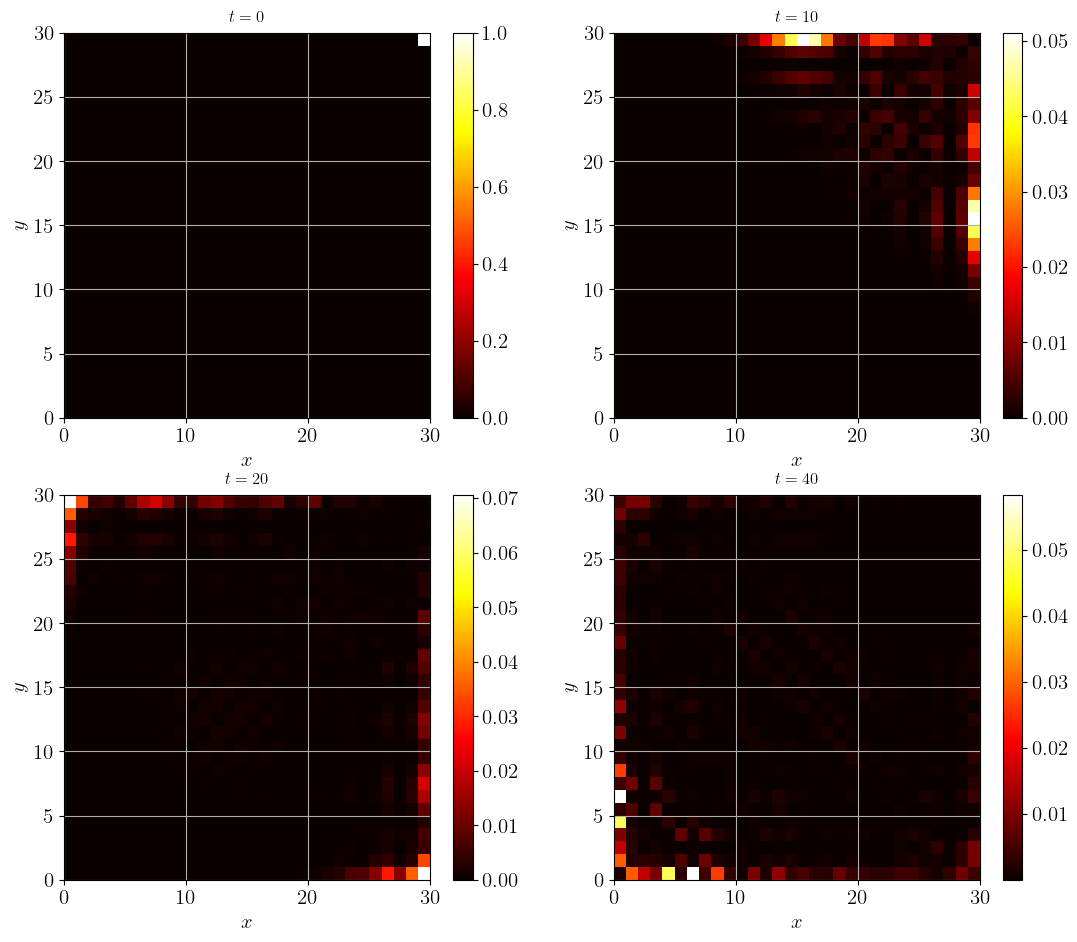

In [46]:
fig_delta = plt.figure(figsize = (13,11))

ax1 = plt.subplot(221)
im = ax1.pcolormesh(x, y, abs(psi_t1)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_delta.colorbar(im, ax = ax1)

ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.grid(axis = 'both')
ax1.text(0.5, +1.03, r"$t = {:d}$".format(t1), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax2 = plt.subplot(222)
im = ax2.pcolormesh(x, y, abs(psi_t2)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_delta.colorbar(im, ax = ax2)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.grid(axis = 'both')
ax2.text(2, +1.03, r"$t = {:d}$".format(t2), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax3 = plt.subplot(223)
im = ax3.pcolormesh(x, y, abs(psi_t3)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_delta.colorbar(im, ax = ax3)
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')
ax3.grid(axis = 'both')
ax3.text(0.5, -0.17, r"$t = {:d}$".format(t3), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax4 = plt.subplot(224)
im = ax4.pcolormesh(x, y, abs(psi_t4)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_delta.colorbar(im, ax = ax4)
ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$y$')
ax4.grid(axis = 'both')
ax4.text(2, -0.17, r"$t = {:d}$".format(t4), size = 12, ha = "center", 
         transform = ax1.transAxes)

Observamos que a função de onda se divide em duas partes e se propaga principalmente ao longo das bordas. No entanto, notamos a rápida diminuição da intensidade da amplitude da função de onda e sua dispersão no bulk. A razão é que não há autoestado que seja um estado de borda perfeito em nosso caso: há sempre uma amplitude não nula no *bulk*. Em outras palavras, se pudéssemos encontrar tal autoestado que é um estado de borda perfeito com uma amplitude não nula apenas na borda, a evolução não dispersaria a função de onda no volume, pois um autovetor é preservado durante a evolução (se não houver degenerescência do autovalor associado).

Para um estado inicial que é uma sobreposição entre um Gaussiano (que possui um quasi-*momentum* $k_{y}$) e $N$ estados de borda, mais precisamente

$$
\psi\left(x,y,t=0\right)=\sum_{n=1}^{N}\left[\int\text{d}x'\text{d}y'\text{}\psi_{n}^{*}\left(x',y'\right)\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\left(y'-y_{0}\right)/2\sigma^{2}}e^{-ik_{y}y'}\right]\psi_{n}\left(x,y\right)\text{ },
$$

$$\tag{4.1}
\therefore\quad\psi\left(x,y,t=0\right)\simeq\sum_{n=1}^{N}\left[\sum_{x',y'}\overset{=1}{\overbrace{\Delta x'\Delta y'}}\psi_{n}^{*}\left(x',y'\right)\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\left(y'-y_{0}\right)/2\sigma^{2}}e^{-ik_{y}y'}\right]\psi_{n}\left(x,y\right)\text{ }.
$$

Podemos observar dois resultados diferentes dependendo dos estados de borda que você está somando. 

In [47]:
def Gauss_init(Lx,Ly,x0,y0,ky,sigma): 
    # sigma = 1 é a menor escolha possível
    init_state = 1j*np.zeros((Ly,Lx))    
    for x in range(Lx):
        for y in range(Ly):
            init_state[y,x] = np.exp(-((x-x0)**2 + (y-y0)**2)/2/sigma**2-1j*ky*y)
    
    return init_state



def overlap(init_state, edge_states):
    out = 1j*edge_states.copy()
    for i in range(len(out)):
        for j in range(len(out[0])):
            out[j,i] = abs(np.conjugate(init_state[j,i])*edge_states[j,i])**2
            
    return out

Na verdade, em relação ao espectro do Hamiltoniano da equação $(3.13)$, você pode somar todos eles ou apenas selecionar os estados de borda correspondentes às energias em um dos dois *gaps*. 

In [48]:
x0 = 0
y0 = 30
ky = 1
sigma = 1

Lx = 30
Ly = 30

gauss_state = Gauss_init(Lx,Ly, x0,y0, ky,sigma)
gauss_state = gauss_state/np.sqrt(sum(sum(abs(gauss_state)**2)))



psi_01 = 1j*np.zeros((Lx,Ly))
for n in range(len(l1)):
    psi_01 += sum(sum(overlap(gauss_state,edgeStates_gap1[n])))*edgeStates_gap1[n]
psi_01 = matrix2vector(psi_01)
psi_01 = psi_01/np.sqrt(np.vdot(psi_01,psi_01))

psi_02 = 1j*np.zeros((Lx,Ly))
for n in range(len(l2)):
    psi_02 += sum(sum(overlap(gauss_state,edgeStates_gap2[n])))*edgeStates_gap2[n]
psi_02 = matrix2vector(psi_02)
psi_02 = psi_02/np.sqrt(np.vdot(psi_02,psi_02))

Vamos avaliar o que acontece em cada *gap*:

#### Gap 1:

In [49]:
t1 = 0
psi_t11 = np.dot(sp_linalg.expm(-1j*t1*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)), psi_01)
psi_t11 = psi_t11/np.sqrt(np.vdot(psi_t11,psi_t11))
psi_t11 = vector2matrix(psi_t11)

t2 = 10
psi_t21 = np.dot(sp_linalg.expm(-1j*t2*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)), psi_01)
psi_t21 = psi_t21/np.sqrt(np.vdot(psi_t21,psi_t21))
psi_t21 = vector2matrix(psi_t21)

print('50% feito...')

#################################

t3 = 40
psi_t31 = np.dot(sp_linalg.expm(-1j*t3*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)), psi_01)
psi_t31 = psi_t31/np.sqrt(np.vdot(psi_t31, psi_t31))
psi_t31 = vector2matrix(psi_t31)

t4 = 50
psi_t41 = np.dot(sp_linalg.expm(-1j*t4*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)), psi_01)
psi_t41 = psi_t41/np.sqrt(np.vdot(psi_t41, psi_t41))
psi_t41 = vector2matrix(psi_t41)

print('100% feito!')

50% feito...
100% feito!


Text(2, -0.17, '$t = 50$')

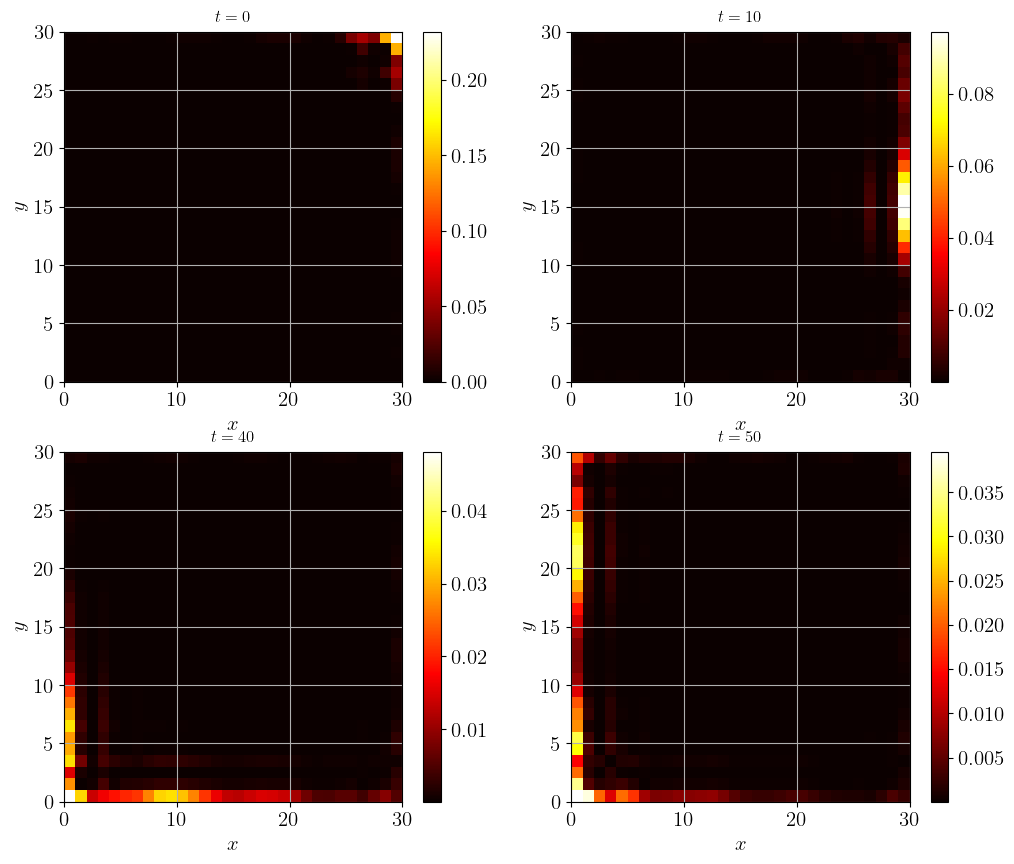

In [50]:
fig_gauss1 = plt.figure(figsize = (12,10))

ax1 = plt.subplot(221)
im = ax1.pcolormesh(x, y, abs(psi_t11)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_gauss1.colorbar(im, ax = ax1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.grid(axis = 'both')
ax1.text(0.5, 1.03, r"$t = {:d}$".format(t1), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax2 = plt.subplot(222)
im = ax2.pcolormesh(x, y, abs(psi_t21)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_gauss1.colorbar(im, ax = ax2)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.grid(axis = 'both')
ax2.text(2, +1.03, r"$t = {:d}$".format(t2), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax3 = plt.subplot(223)
im = ax3.pcolormesh(x, y, abs(psi_t31)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_gauss1.colorbar(im, ax = ax3)
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')
ax3.grid(axis = 'both')
ax3.text(0.5, -0.17, r"$t = {:d}$".format(t3), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax4 = plt.subplot(224)
im = ax4.pcolormesh(x, y, abs(psi_t41)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_gauss1.colorbar(im, ax = ax4)
ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$y$')
ax4.grid(axis = 'both')
ax4.text(2, -0.17, r"$t = {:d}$".format(t4), size = 12, ha = "center", 
         transform = ax1.transAxes)

#### Gap 2:

In [51]:
t1 = 0
psi_t12 = np.dot(sp_linalg.expm(-1j*t1*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)), psi_02)
psi_t12 = psi_t12/np.sqrt(np.vdot(psi_t12,psi_t12))
psi_t12 = vector2matrix(psi_t12)

t2 = 10
psi_t22 = np.dot(sp_linalg.expm(-1j*t2*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)), psi_02)
psi_t22 = psi_t22/np.sqrt(np.vdot(psi_t22,psi_t22))
psi_t22 = vector2matrix(psi_t22)

print('50% feito...')

#################################

t3 = 40
psi_t32 = np.dot(sp_linalg.expm(-1j*t3*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)), psi_02)
psi_t32 = psi_t32/np.sqrt(np.vdot(psi_t32,psi_t32))
psi_t32 = vector2matrix(psi_t32)

t4 = 60
psi_t42 = np.dot(sp_linalg.expm(-1j*t4*H_Hofstatder_square(tx,ty, p,q, positions_x,positions_y, Lx,Ly)), psi_02)
psi_t42 = psi_t42/np.sqrt(np.vdot(psi_t42,psi_t42))
psi_t42 = vector2matrix(psi_t42)
print('100% feito!')

50% feito...
100% feito!


Text(2, -0.17, '$t = 60$')

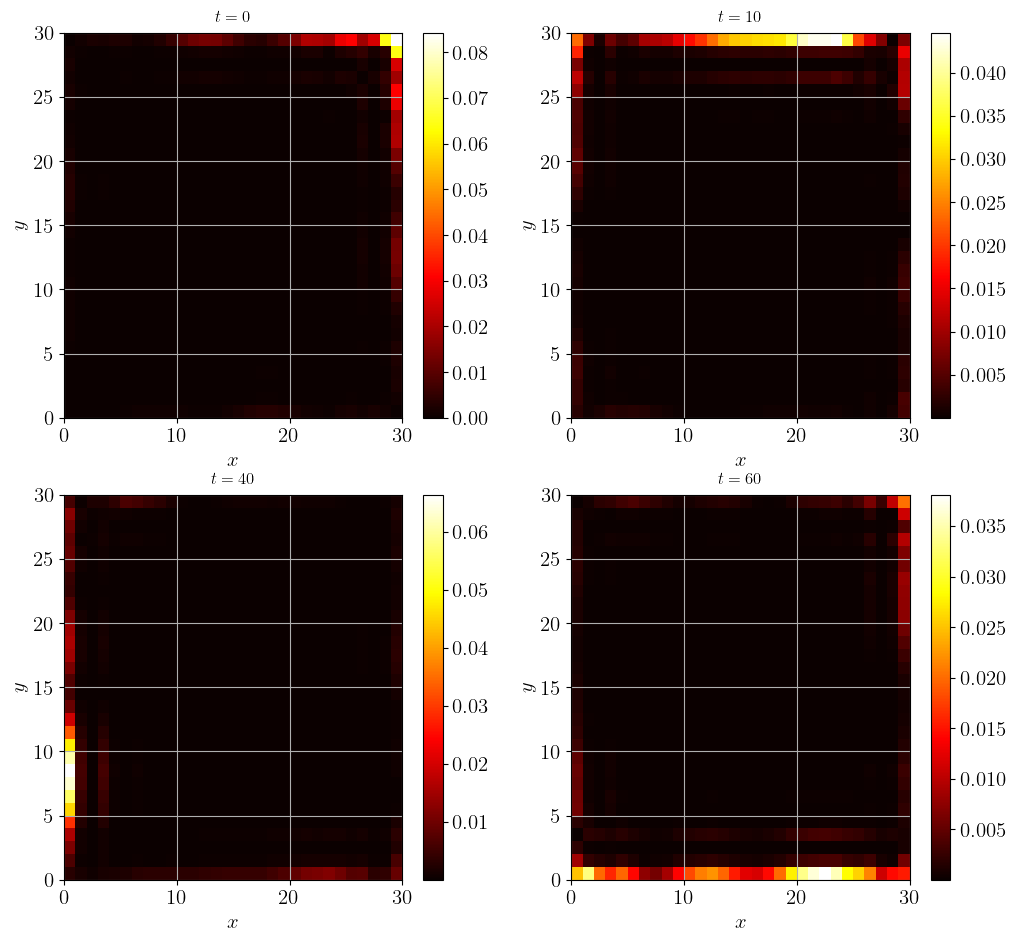

In [52]:
fig_gauss2 = plt.figure(figsize = (12,11))

ax1 = plt.subplot(221)
im = ax1.pcolormesh(x, y, abs(psi_t12)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_gauss2.colorbar(im, ax = ax1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.grid(axis = 'both')
ax1.text(0.5, 1.03, r"$t = {:d}$".format(t1), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax2 = plt.subplot(222)
im = ax2.pcolormesh(x, y, abs(psi_t22)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_gauss2.colorbar(im, ax = ax2)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.grid(axis = 'both')
ax2.text(2, +1.03, r"$t = {:d}$".format(t2), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax3 = plt.subplot(223)
im = ax3.pcolormesh(x, y, abs(psi_t32)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_gauss2.colorbar(im, ax = ax3)
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')
ax3.grid(axis = 'both')
ax3.text(0.5, -0.17, r"$t = {:d}$".format(t3), size = 12, ha = "center", 
         transform = ax1.transAxes)

ax4 = plt.subplot(224)
im = ax4.pcolormesh(x, y, abs(psi_t42)**2, cmap = 'hot', linewidth = 0, rasterized = True)
fig_gauss2.colorbar(im, ax = ax4)
ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$y$')
ax4.grid(axis = 'both')
ax4.text(2, -0.17, r"$t = {:d}$".format(t4), size = 12, ha = "center", 
         transform = ax1.transAxes)

No primeiro caso, você não terá nenhuma diferença qualitativa em relação à situação precedente com a função $\delta$. A segunda é mais interessante: em função do *gap* que você selecionou, o pacote de ondas irá no sentido horário ou anti-horário. Isso é consequência da quiralidade do sistema.

### 4.1 Comparação de velocidades entre sistemas cilíndricos e de contorno aberto

Lembremos que no caso do sistema de contorno cilíndrico, optamos por fechar as arestas $y$ ($L_{y}$ é assimilado a $0$). Uma vez que existem apenas saltos de curto alcance aqui, um elétron não pode realmente detectar se está em um sistema cilíndrico ou em um sistema de contorno aberto, desde que esteja no meio de uma aresta $y$ (para $L_{y}$ suficientemente grande). Isso implica que podemos deduzir várias coisas da caixa do cilindro que se aplicam à caixa aberta. Por exemplo, podemos deduzir a velocidade de grupo do pacote de ondas no caso aberto, quando ele se propaga ao longo de uma aresta $y$, graças à fórmula

$$\tag{4.2}
v\left(k_{y}\right)=\frac{\partial E\left(k\right)}{\partial k}\left(k_{y}\right)\text{ },
$$

que é dedutível no caso cilíndrico. Alertamos o leitor que não pudemos verificar esta afirmação devido a um problema que não conseguimos resolver no tempo previsto. Ainda acreditamos que o comentário acima sobre as semelhanças em ambos os sistemas experimentadas por um elétron no meio de uma aresta $y$, deve levar ao resultado desejado. Se nosso código tivesse funcionado corretamente, aqui está o procedimento que teríamos seguido. Primeiro, você escolhe um valor de $k_{y}$ no segundo gráfico da seção **3.3** em uma das duas lacunas. Por um lado, nós o usamos na função gaussiana que introduzimos na Equação $(4.1)$ e calculamos a evolução da sobreposição no mesmo gap de antes ao longo das arestas $y$; com isso queremos dizer que você pode rastrear a posição e extrair a velocidade de seu movimento, $v_{O}$. Por outro lado, avaliamos $v_{C}$ do segundo gráfico da seção **3.3** usando $(4.2)$ para o mesmo valor de $k_{y}$. Espera-se que $v_{C}=v_{O}$.

### 4.2 Artigo sobre experimentos fotônicos

A referência **[2]** discute um experimento sobre sistemas fotônicos topológicos baseado no modelo de Hofstadter. É, grosso modo, uma questão de substituir os elétrons por fótons, mas ainda experimentando os mesmos resultados. Para isso, é necessária a possibilidade de salto entre locais vizinhos e um campo magnético. Para entender como isso pode ser projetado, convidamos você a consultar a referida referência. 

Embora a configuração experimental não contenha realmente um elemento de campo magnético real, um sintético pode ser criado e, assim, influenciar o salto de fótons entre sites vizinhos em duas direções opostas, graças a um arranjo específico de ressonadores de link e site. Conforme mostrado anteriormente, estados topológicos de borda são observáveis experimentalmente. Além disso, são quirais. Os fótons contornam o ressonador ausente e depois continuam seu caminho. Ao comparar os resultados do artigo com os nossos, podemos argumentar que eles são qualitativamente semelhantes (não quantitativamente). Para observar que eles estão “protegidos”, um ressonador pode ser removido do caminho de um estado de borda. A luz simplesmente contornará o ressonador ausente.

---

## 5. Conclusões

Depois de introduzir as noções básicas sobre física topológica e úteis para entender o efeito Hall quântico, comparamos a curvatura de Berry em torno de um ponto de Dirac para os sistemas Dirac e Honeycomb. Parece que eles combinam indiscutivelmente bem.

Em seguida, discutimos as modificações que um campo magnético pode implicar no sistema e particularmente na zona de Brillouin. Isso nos permitiu descrever o modelo $1/3$ de Hofstadter com diferentes condições de contorno.

Deixamos então o sistema evoluir para duas condições iniciais diferentes. A sobreposição com a função $\delta$ separou-se em dois pacotes de ondas que se propagaram em direções opostas, ao contrário da sobreposição gaussiana, que tomou o caminho no sentido horário ou anti-horário dependendo do gap sobreposto; isto exibiu a natureza quiral de um tal sistema.

Eventualmente, tentamos verificar a consistência dos modelos comparando o comportamento de um elétron nos sistemas cilíndrico e aberto próximo a uma borda $y$. Embora isso seja consistente em teoria e acredita-se que isso pode ser provado, o autor deste não conseguiu fazer isso neste `Notebook`.

---

## Referências

- **[1]** David Tong. *Lectures on the Quantum Hall Effect*. 2016. (veja p. 2) ;

- **[2]** Tomoki Ozawa, Hannah M. Price, Alberto Amo, Nathan Goldman, Mohammad Hafezi, Ling Lu, Mikael Rechtsman, David Schuster, Jonathan Simon, Oded Zilberberg, $\&$ Iacopo Carusotto. *Topological Photonics*. **91**: 2018. (veja pp. 3, 21, 25) ;

- **[3]** Jean Dalibard. *La matière topologique et son exploration avec les gaz quantiques*. Collège de France, chaire Atomes et rayonnement, URL: [https://www.college-de-france.fr/media/jean-dalibard/UPL7297697706384107935_Dalibard_notes3_20140528.pdf](https://www.college-de-france.fr/media/jean-dalibard/UPL7297697706384107935_Dalibard_notes3_20140528.pdf) (veja p. 3) ;

- **[4]** Jean Dalibard. *La matière topologique et son exploration avec les gaz quantiques*. Collège de France, chaire Atomes et rayonnement, [http://www.phys.ens.fr/~dalibard/CdF/2018/notes_cours_total.pdf](http://www.phys.ens.fr/~dalibard/CdF/2018/notes_cours_total.pdf) (veja p. 3) ;

- **[5]** Jean Dalibard. *Introduction to the physics of artificial gauge fields*. 2015. (veja p. 3) ;

- **[6]** T. Fukui, Y. Hatsugai, $\&$ H. Suzuki. *Chern numbers in discretized Brillouin zone: Efficient method of computing (spin) Hall conductances*. Journal of the Physical Society of Japan, **74**: 1674 – 1677, 2005. (veja p. 5) ;

- **[7]** Di Xiao, Ming-Che Chang, $\&$ Qian Niu. *Berry phase effect on electronic properties*. Reviews of Modern Physics, **82**: 2010. (veja p. 6) ;

- **[8]** B. Andrei Bernevig $\&$ Taylor L. Hughes. *Topological insulators and topological superconductors*. Topological Insulators and Topological Superconductors, 2013. (veja p. 6) ;

- **[9]** Hatsugai. *Edge states in the integer quantum Hall effect and the Riemann surface of the Bloch function*. Physical review. B, Condensed matter, **48**: 1993. (veja p. 17) .

---